# **Amazon Data Analysis**
### `Problem Statement:`
Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.
<br>

Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise
<br>

Find key metrics and factors and show the meaningful relationships between
attributes. Do your own research and come up with your findings.
<br>

## Importing Libraries



In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset


In [45]:
amazon_data = pd.read_csv("DataSets\Amazon Sales data.csv")

In [46]:
amazon_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


Features of Amazon Data
<br>

`Region:`This field indicates the geographic region where the sale occurred. <br>
`Country:`Specifies the country within the region where the sale was made.<br>
`Item Type:`Categories of the items sold.<br>
`Sales Channel:`Indicates whether the sale was made online or offline.<br>
`Order Priority:` Represents the priority level of the order.<br>
`Order Date:`The date on which the order was placed.<br>
`Order ID:`A unique identifier assigned to each order.<br>
`Ship Date:`The date on which the order was shipped.<br>
`Units Sold:`The number of units sold in the transaction.<br>
`Unit Price:`The price per unit of the item sold.<br>
`Unit Cost:`The cost per unit to the seller.<br>
`Total Revenue:`The total revenue generated from the sale.<br>
`Total Cost:`The total cost incurred for the sale.<br>
`Total Profit:`The profit made from the sale after subtracting the total cost from the total revenue.

## Exploring the Data

In [47]:
amazon_data.shape

(100, 14)

There are 100 rows and 14 columns

In [48]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


## Data type Conversion
Converting `Order Date` and `Ship Date` to datetime formats

In [49]:
amazon_data["Order Date"] = pd.to_datetime(amazon_data["Order Date"])

In [50]:
amazon_data["Ship Date"] = pd.to_datetime(amazon_data['Ship Date'])

In [51]:
amazon_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [52]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

Now each column is of correct datatype

## Getting General Statistics about Data

In [53]:
amazon_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,100,2013-09-16 14:09:36,2010-02-02 00:00:00,2012-02-14 12:00:00,2013-07-12 12:00:00,2015-04-07 00:00:00,2017-05-22 00:00:00,NaN
Order ID,100.0,555020412.36,114606559.0,338922488.0,557708561.0,790755080.75,994022214.0,260615257.131426
Ship Date,100,2013-10-09 22:48:00,2010-02-25 00:00:00,2012-02-24 18:00:00,2013-08-11 12:00:00,2015-04-28 00:00:00,2017-06-17 00:00:00,NaN
Units Sold,100.0,5128.71,124.0,2836.25,5382.5,7369.0,9925.0,2794.484562
Unit Price,100.0,276.7613,9.33,81.73,179.88,437.2,668.27,235.592241
Unit Cost,100.0,191.048,6.92,35.84,107.275,263.33,524.96,188.208181
Total Revenue,100.0,1373487.6831,4870.26,268721.2125,752314.36,2212044.6825,5997054.98,1460028.706824
Total Cost,100.0,931805.6991,3612.24,168868.0275,363566.385,1613869.7175,4509793.96,1083938.252188
Total Profit,100.0,441681.984,1258.02,121443.585,290767.995,635828.8,1719922.04,438537.90706


Observations:<br>

`Order Date:` Min Date is 2010-02-02 and Max Date is 2017-05-22.<br>
`Order ID:`Not important.<br>
`Ship Date:`Min Date is 2010-02-25 and Max Date is 2017-06-17.<br>
`Units Sold:` Minimum sales is 124, Maximum sales is 9925 and average sales is 5128.<br>
`Unit Price:` Minimum Price is 9, Maximum Price is 668 and average Price is 276.<br>
`Unit Cost:` Minimum Cost is 6, Maximum Cost is 524 and average Cost is 191.<br>
`Total Revenue:` Minimum Total Revenue generated is 4870, Maximum Total Revenue generated is 6 million(approx.) and average Total Revenue generated is 1.3 million.<br>
`Total Cost:` Minimum Total Cost is 3612, Maximum Total Cost is 4.5 million and average Total cost is 0.9 million.<br>
`Total Profit:` Minimum Total Profit is 1258, Maximum Total Profit is 1.7 million and average Total Profit is 0.4 million.<br> 

In [54]:
amazon_data.describe(include='object').T

,count,unique,top,freq
Region,100,7,Sub-Saharan Africa,36
Country,100,76,The Gambia,4
Item Type,100,12,Clothes,13
Sales Channel,100,2,Offline,50
Order Priority,100,4,H,30


Observations:<br>

`Region:` There are 7 different Regions and most appearing is Sub-Saharan Africa.<br>
`Country:` There are 76 different Country and most appearing is The Gambia.<br>
`Item type:` There are 12 different categories of Item and most appearing is Clothes.<br>
`Sales Channel:` There are two Sales Channel _Offline_ and _Online_ both of them equally appearing.<br>
`Order Priority:` There are four different order priorities: _High_, _Medium_, _Common_, _Low_ in which most appearing is _High_.<br>


## Data Handling
Checking for null values and duplicates

In [55]:
amazon_data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [56]:
amazon_data.duplicated().sum()

0

No duplicates and Null values found in Data set

## Dropping irrelevant columns
Shipping date and Order Id has no relevance for finding the sales trend month , year and yearly-month wise

In [57]:
amazon_data.drop(columns=['Ship Date','Order ID'],inplace=True)

In [58]:
amazon_data.shape

(100, 12)

In [59]:
amazon_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [60]:
print(amazon_data['Country'].unique())

['Tuvalu' 'Grenada' 'Russia' 'Sao Tome and Principe' 'Rwanda'
 'Solomon Islands' 'Angola' 'Burkina Faso' 'Republic of the Congo'
 'Senegal' 'Kyrgyzstan' 'Cape Verde' 'Bangladesh' 'Honduras' 'Mongolia'
 'Bulgaria' 'Sri Lanka' 'Cameroon' 'Turkmenistan' 'East Timor' 'Norway'
 'Portugal' 'New Zealand' 'Moldova ' 'France' 'Kiribati' 'Mali'
 'The Gambia' 'Switzerland' 'South Sudan' 'Australia' 'Myanmar' 'Djibouti'
 'Costa Rica' 'Syria' 'Brunei' 'Niger' 'Azerbaijan' 'Slovakia' 'Comoros'
 'Iceland' 'Macedonia' 'Mauritania' 'Albania' 'Lesotho' 'Saudi Arabia'
 'Sierra Leone' "Cote d'Ivoire" 'Fiji' 'Austria' 'United Kingdom'
 'San Marino' 'Libya' 'Haiti' 'Gabon' 'Belize' 'Lithuania' 'Madagascar'
 'Democratic Republic of the Congo' 'Pakistan' 'Mexico'
 'Federated States of Micronesia' 'Laos' 'Monaco' 'Samoa ' 'Spain'
 'Lebanon' 'Iran' 'Zambia' 'Kenya' 'Kuwait' 'Slovenia' 'Romania'
 'Nicaragua' 'Malaysia' 'Mozambique']


## Data Augmentation
Adding _Month_ column for finding monthly sales, similarly _Year_ and _Month-Year_

In [61]:
amazon_data['Month'] = amazon_data['Order Date'].dt.month
amazon_data['Year'] = amazon_data['Order Date'].dt.year
amazon_data['Month_Year'] = amazon_data['Order Date'].dt.strftime('%Y-%m')

In [62]:
amazon_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Year,Month_Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2013-02


In [63]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Units Sold      100 non-null    int64         
 7   Unit Price      100 non-null    float64       
 8   Unit Cost       100 non-null    float64       
 9   Total Revenue   100 non-null    float64       
 10  Total Cost      100 non-null    float64       
 11  Total Profit    100 non-null    float64       
 12  Month           100 non-null    int32         
 13  Year            100 non-null    int32         
 14  Month_Year      100 non-null    object        
dtypes: date

In [64]:
amazon_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,100,2013-09-16 14:09:36,2010-02-02 00:00:00,2012-02-14 12:00:00,2013-07-12 12:00:00,2015-04-07 00:00:00,2017-05-22 00:00:00,NaN
Units Sold,100.0,5128.71,124.0,2836.25,5382.5,7369.0,9925.0,2794.484562
Unit Price,100.0,276.7613,9.33,81.73,179.88,437.2,668.27,235.592241
Unit Cost,100.0,191.048,6.92,35.84,107.275,263.33,524.96,188.208181
Total Revenue,100.0,1373487.6831,4870.26,268721.2125,752314.36,2212044.6825,5997054.98,1460028.706824
Total Cost,100.0,931805.6991,3612.24,168868.0275,363566.385,1613869.7175,4509793.96,1083938.252188
Total Profit,100.0,441681.984,1258.02,121443.585,290767.995,635828.8,1719922.04,438537.90706
Month,100.0,6.26,1.0,4.0,6.0,9.25,12.0,3.353334
Year,100.0,2013.23,2010.0,2012.0,2013.0,2015.0,2017.0,2.088231


In [65]:
amazon_data.describe(include='object').T

,count,unique,top,freq
Region,100,7,Sub-Saharan Africa,36
Country,100,76,The Gambia,4
Item Type,100,12,Clothes,13
Sales Channel,100,2,Offline,50
Order Priority,100,4,H,30
Month_Year,100,60,2011-11,4


## Exploratory Data Analysis
Bivariate and Multivariate Analysis of sales with other features

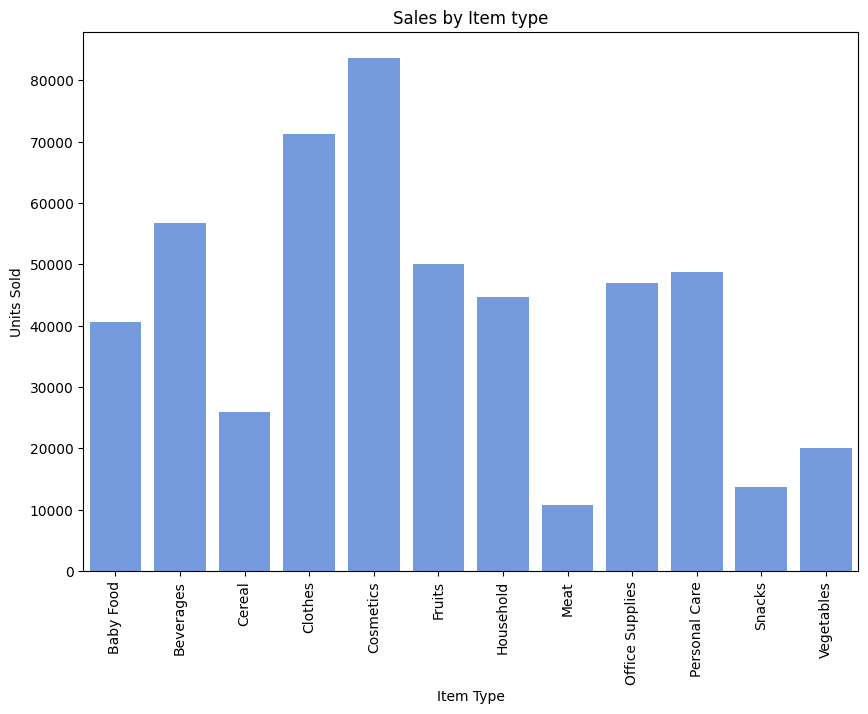

In [66]:
channel_data = amazon_data.groupby('Item Type').sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='Item Type', y='Units Sold', data=channel_data, color='cornflowerblue')
plt.xticks(rotation='vertical')
plt.title('Sales by Item type')
plt.show()

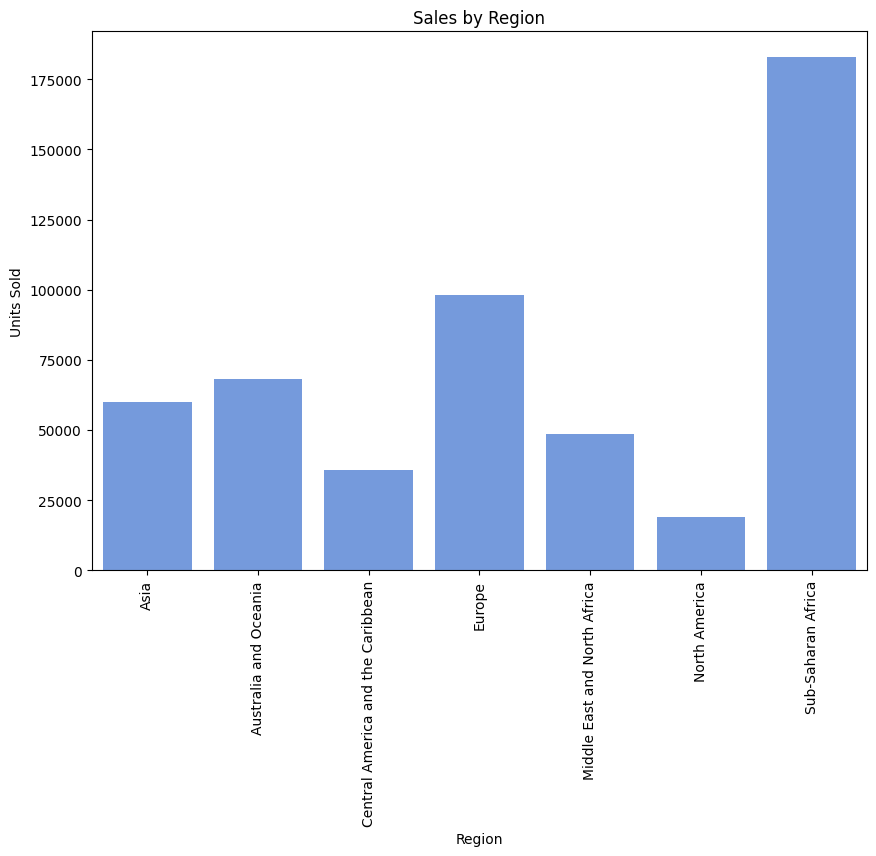

In [67]:
channel_data = amazon_data.groupby('Region').sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='Region', y='Units Sold', data=channel_data, color='cornflowerblue')
plt.xticks(rotation='vertical')
plt.title('Sales by Region')
plt.show()

Observations:<br>

`Sub-Saharan Africa` is the region with most sales and `North America` with least sales.

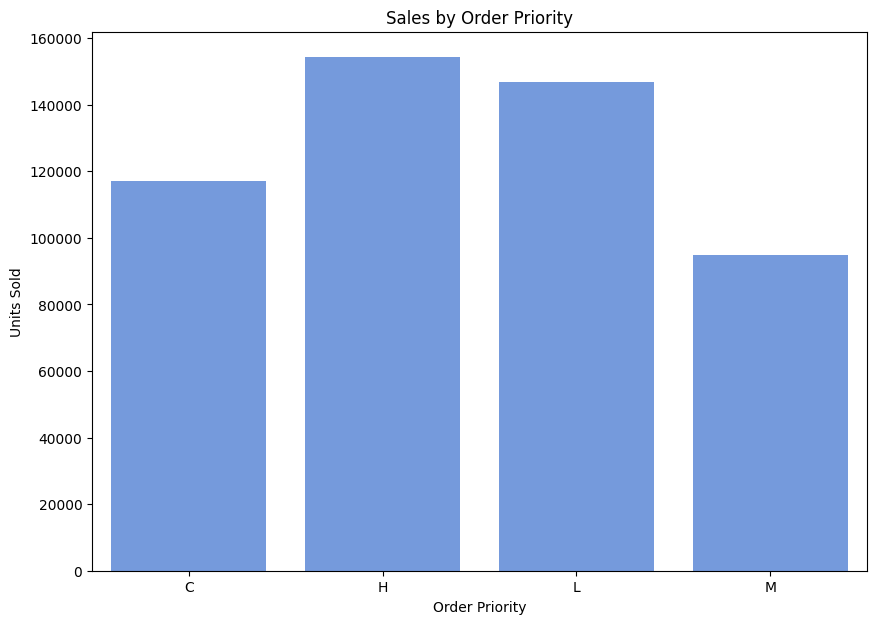

In [68]:
channel_data = amazon_data.groupby('Order Priority').sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='Order Priority', y='Units Sold', data=channel_data, color='cornflowerblue')
plt.title('Sales by Order Priority')
plt.show()

Observations:<br>

All Order Priority sales are normally distributed but `H` has most sales and `M` has least sales throughout the dataset.

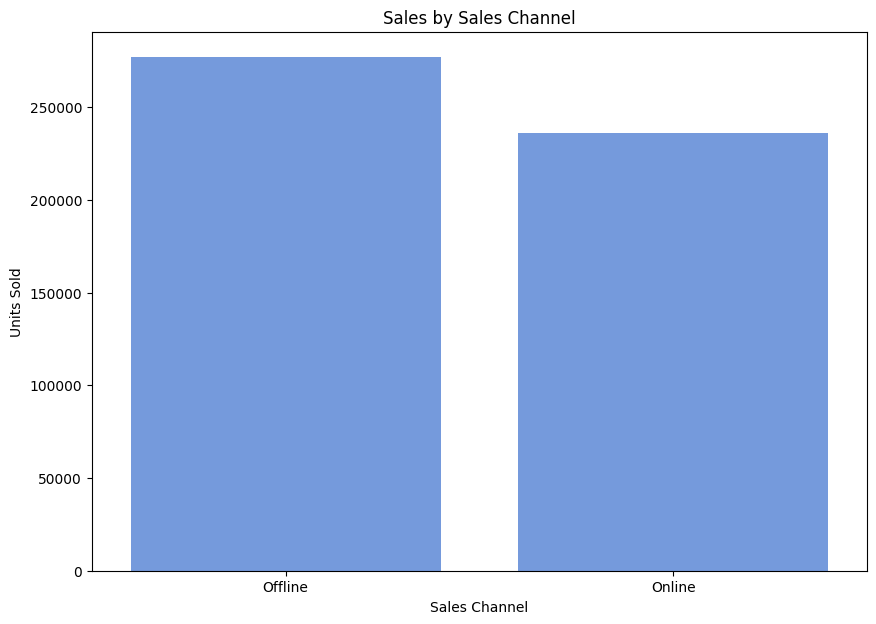

In [69]:
channel_data = amazon_data.groupby('Sales Channel').sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='Sales Channel', y='Units Sold', data=channel_data, color='cornflowerblue')
plt.title('Sales by Sales Channel')
plt.show()

Observations:<br>

`Offline` sales are greater than the `Online` sales.

In [70]:
cornflower_blue = "#6495ED"
matching_red = "#ED6A5A"
my_palette = sns.color_palette([cornflower_blue, matching_red])
base_colors = ["#C47482", "#9AD9DB", "#EB96AA", "#9C9359", "#D29F8C", 
               "#F27348", "#2CCED2", "#F9968B", "#84A6D6", "#A15D98", 
               "#F7CE76", "#7C98AB"]

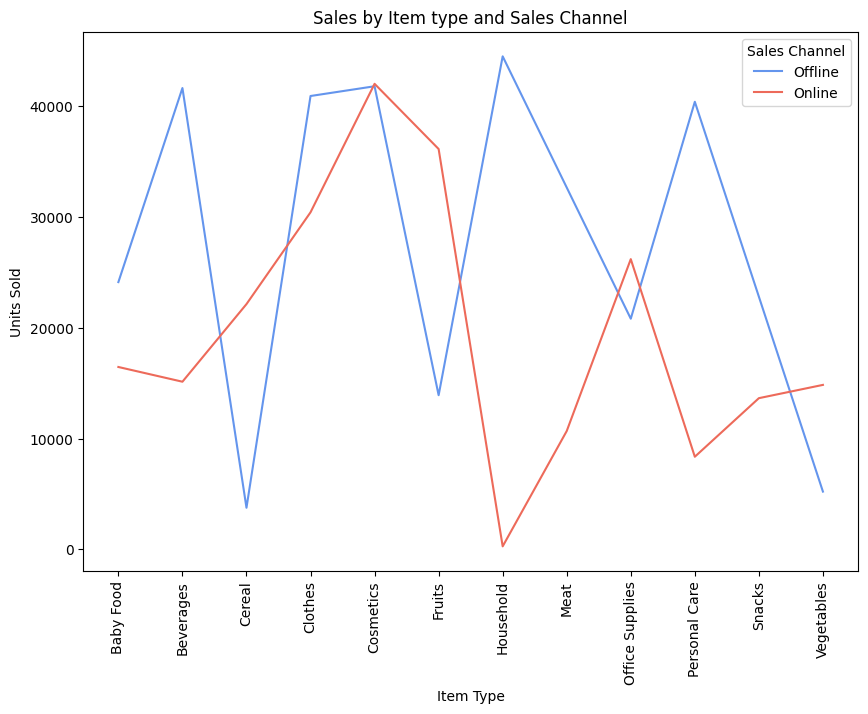

In [71]:
channel_data = amazon_data.groupby(['Item Type','Sales Channel']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
sns.lineplot(x='Item Type', y='Units Sold', data=channel_data,hue='Sales Channel',palette=my_palette)
plt.xticks(rotation='vertical')
plt.title('Sales by Item type and Sales Channel')
plt.show()

Observations:<br>

##### `Offline Channel:`
- `Beverages`, `Clothes`, `Cosmetics`, `Household`, `Personal Care` have sales near about 40,000 in `Offline` channel.
- `Cereal` have the least sales in `Offline` channel.

##### `Online Channel:`
- `Cosmetics` have most sales in `Online Channel`.
- `Household` have least sales in `Online Channel`.

##### `Key Observation:`
There is no change in the sales of `Cosmetics` item in both `Online` as well as `Offline` channel.

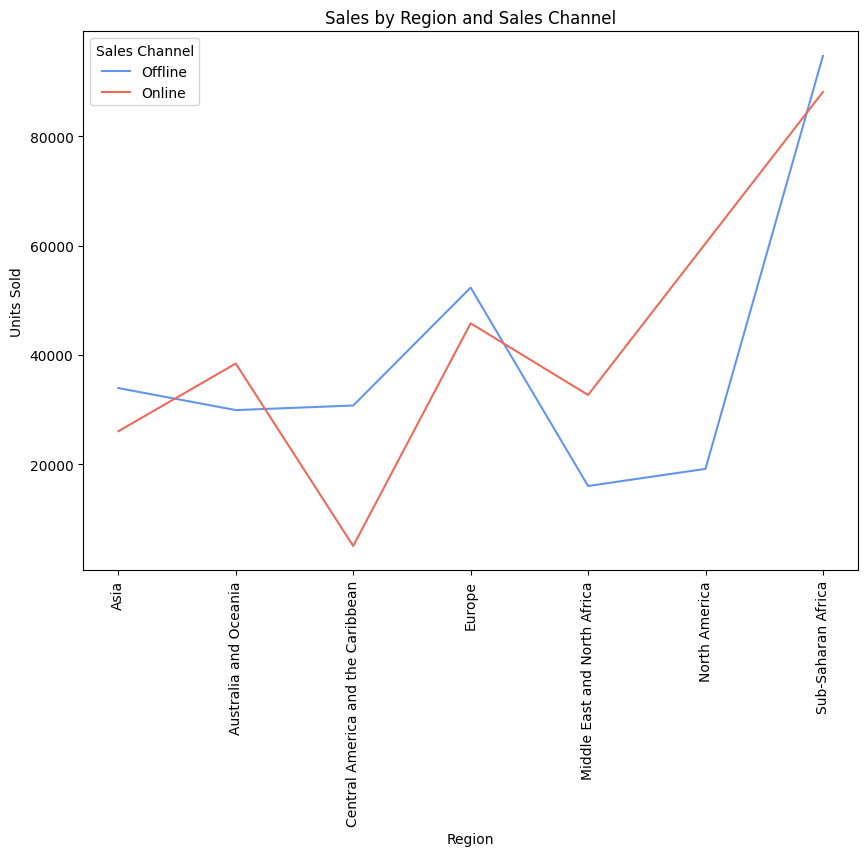

In [72]:
channel_data = amazon_data.groupby(['Region','Sales Channel']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
sns.lineplot(x='Region', y='Units Sold', data=channel_data,hue='Sales Channel',palette=my_palette)
plt.xticks(rotation='vertical')
plt.title('Sales by Region and Sales Channel')
plt.show()

Observations:<br>

##### `Offline Channel:`
- `Sub-Saharan Africa` has the most sales in `Offline` channel over 80,000.
- `Middle East and North Africa` and `North America` have least sales in `Offline` Channel near about 20,000.

##### `Online Channel:`
- `Sub-Saharan Africa` has the most sales in `Online` channel over 80,000.
- `Central America and the Caribean` has least sales in `Online` channel below 10,000.

##### `Key Observations:`
- Regions like `Asia`, `Australia and Oceania`, `Europe`, `Sub-Saharan Africa` maintained their sales in both `Offline` and `Online` channel.
- Whereas `Central America and the Caribean`, `Middle East and North Africa` can't maintained their sales in both Channels.
- There are no `Online` sales in region of `North America`.




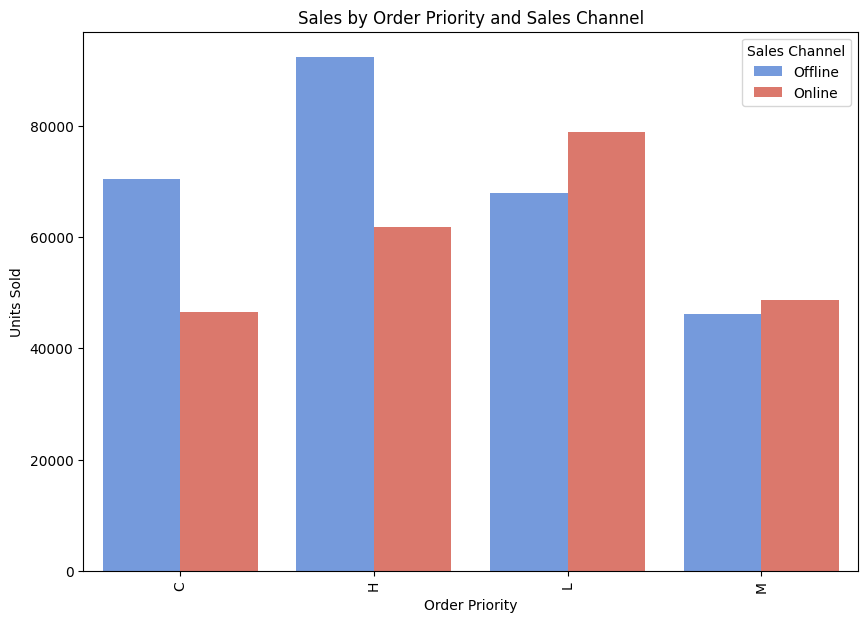

In [73]:
channel_data = amazon_data.groupby(['Order Priority','Sales Channel']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='Order Priority', y='Units Sold', data=channel_data,hue='Sales Channel',palette=my_palette)
plt.title('Sales by Order Priority and Sales Channel')
plt.xticks(rotation='vertical')
plt.show()

Observations:<br>

##### `Offline Channel:`
- `H` priority orders have the most sales above 80,000.
- `M` priority orders have the least sales below 50,000.

##### `Online Channel:`
- `L` priority orders have the most sales near about 80,000.
- `M` and `C` priority orders have the least sales below 50,000.

##### `Key Observations:`
- There is not much difference in sales of `M` priority orders in both channels.
- `H` and `C` priority orders have greater sales in `Offline` mode whereas `L` and `M` priority orders have greater sales in `Online` Mode.




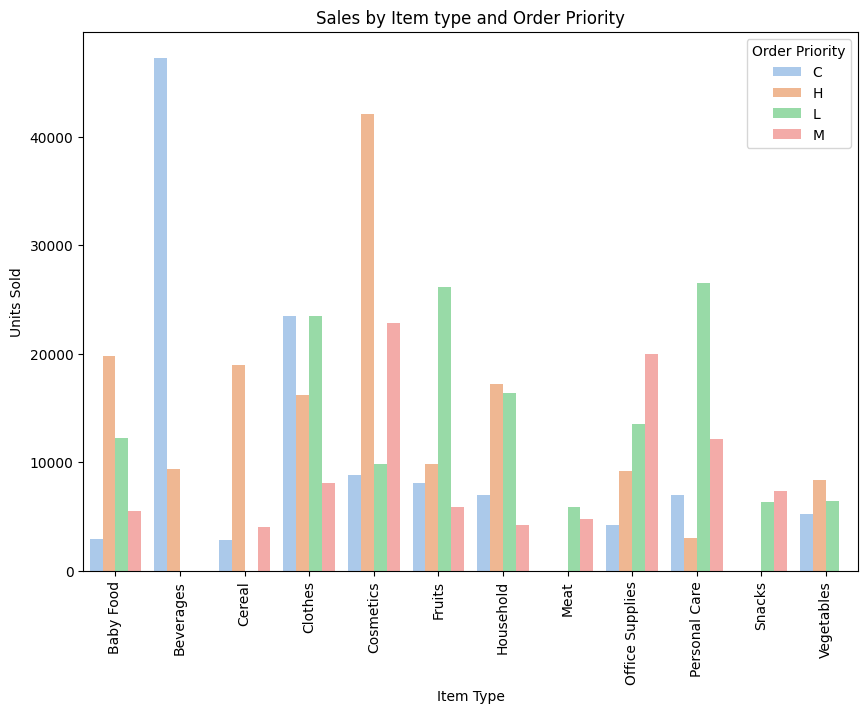

In [92]:
channel_data = amazon_data.groupby(['Item Type','Order Priority']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='Item Type', y='Units Sold', data=channel_data,hue='Order Priority',palette='pastel')
plt.xticks(rotation='vertical')
plt.title('Sales by Item type and Order Priority')
plt.show()

Observations:<br>

`Order Priority C (Blue):`
- `Beverages:` Highest sales among all item types.
- `Clothes`, `Fruits`, and `Household`: Moderate sales.
- `Personal Care`: Lowest sales.<br>

`Order Priority H (Orange):`
- `Cosmetics`: Highest sales among all item types.
- `Cereal`, `Fruits`, and `Personal Care`: Moderate sales.
- `Office Supplies and Snacks`: Lower sales.<br>

`Order Priority L (Green):`
- `Personal Care:` Highest sales among all item types.
- Cosmetics and Fruits: Moderate sales.
- Beverages and Snacks: Lower sales.<br>

`Order Priority M (Red):`
- `Cosmetics and Fruits:` Highest sales among all item types.
- `Personal Care and Cereal:` Moderate sales.
- `Office Supplies and Snacks:` Lower sales.<br>

`General Observations:`
- `Cosmetics:` High sales across H, M, and moderate in L.
- `Personal Care:` High sales in L, moderate in M and H, low in C.
- `Beverages:` Dominates in C but lower in other priorities.
- `Fruits:` Consistently high in H, M, and moderate in C.
- `Office Supplies and Snacks:` Generally lower sales across all priorities.<br>

These observations suggest that certain item types perform better under specific order priorities, with Cosmetics and Fruits being popular across multiple priorities, whereas Beverages excel primarily in the C priority.

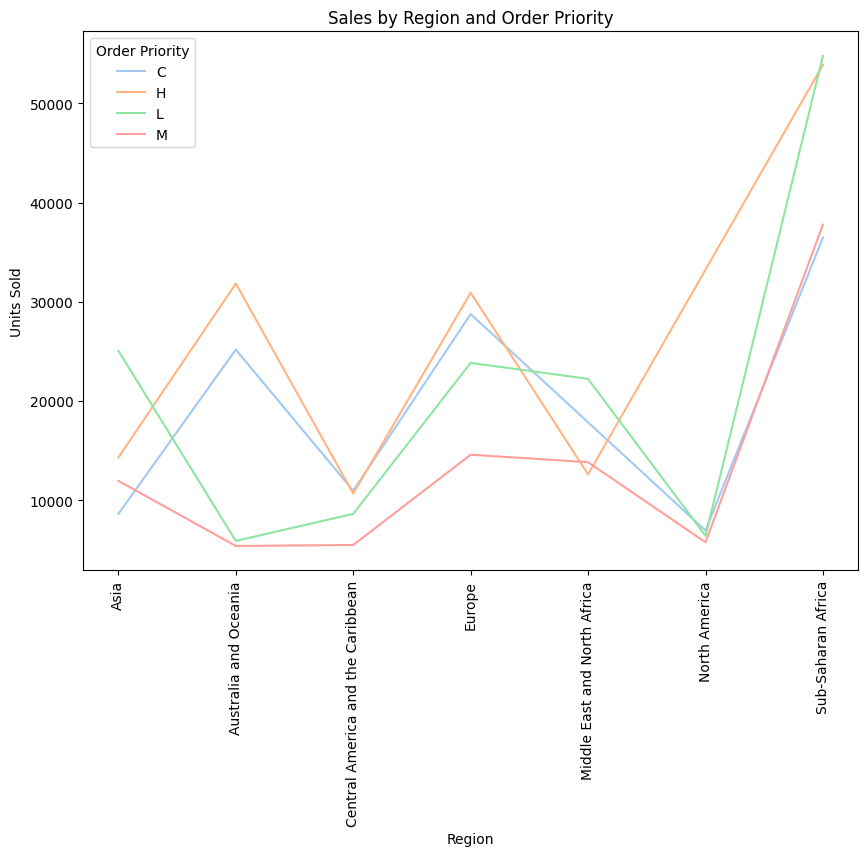

In [75]:
channel_data = amazon_data.groupby(['Region','Order Priority']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
sns.lineplot(x='Region', y='Units Sold', data=channel_data,hue='Order Priority',palette='pastel')
plt.xticks(rotation='vertical')
plt.title('Sales by Region and Order Priority')
plt.show()

Observations:<br>
`Order Priority C (Blue):`
- `Sub-Saharan Africa:` Highest sales among all regions.
- `Australia and Oceania, Europe, and North America`: Moderate sales.
- `Central America and the Caribbean , and Middle East and North Africa`: Lower sales.<br>

`Order Priority H (Orange):`
- `Sub-Saharan Africa:` Highest sales among all regions.
- `Europe and Australia and Oceania:` Moderate sales.
- `Central America and the Caribbean, and Middle East and North Africa:` Lower sales.<br>

`Order Priority L (Green):`
- `Sub-Saharan Africa:` Highest sales among all regions.
- `Europe and Asia:` Moderate sales.
- `Central America and the Caribbean, and Middle East and North Africa:` Lower sales.<br>

`Order Priority M (Red):`
- `Sub-Saharan Africa:` Highest sales among all regions.
- `North America:` Moderate sales.
- `Central America and the Caribbean, and Middle East and North Africa:` Lower sales.<br>

`General Observations:`
- `Sub-Saharan Africa:` Consistently shows the highest sales across all order priorities.
- `Europe:` Generally moderate sales across different priorities.
- `Central America and the Caribbean, and Middle East and North Africa:` Lower sales across all priorities.
- `Asia and Australia and Oceania:` Fluctuate between moderate to high sales depending on the order priority.
- `North America:` Shows a peak in the H priority but otherwise moderate to low sales.<br>

These observations suggest that Sub-Saharan Africa has a significant demand across all order priorities, while Europe maintains a consistent moderate demand. Other regions show more variability in sales depending on the order priority.

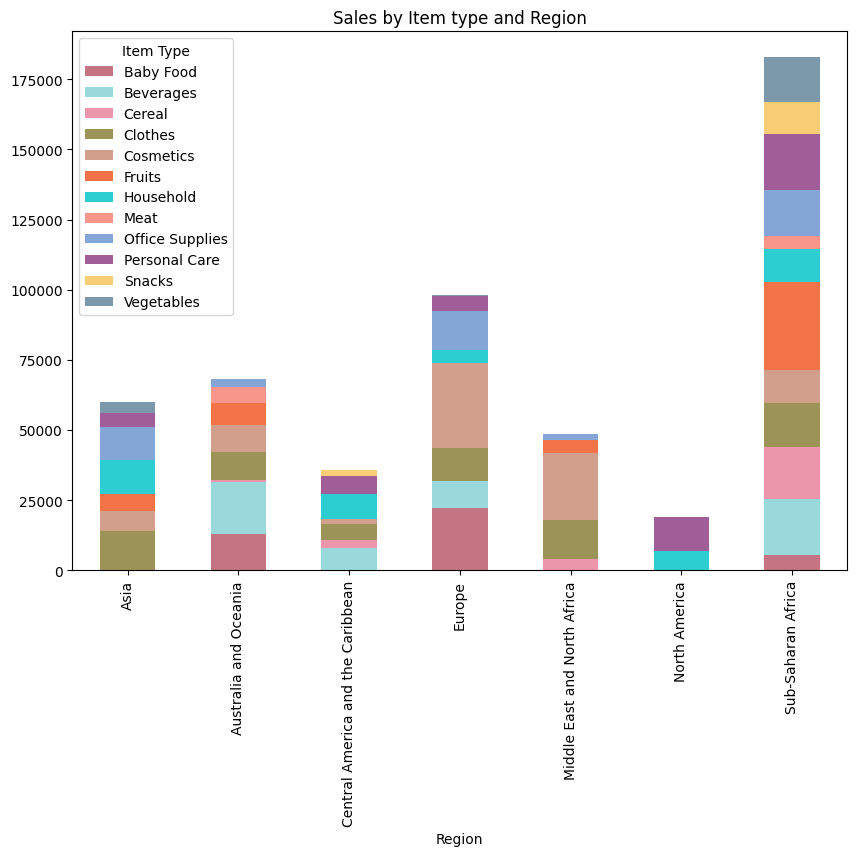

In [76]:
channel_data = amazon_data.groupby(['Item Type','Region']).sum(numeric_only=True)['Units Sold'].reset_index()
pivot_data = channel_data.pivot(index='Region', columns='Item Type', values='Units Sold')
pivot_data.plot(kind='bar', stacked=True,color=base_colors,figsize=(10,7))
plt.xticks(rotation='vertical')
plt.title('Sales by Item type and Region')
plt.show()

Observations:<br>

`Sub-Saharan Africa:`
- Highest sales among all regions.
- Major contributors: Cosmetics, Baby Food, Beverages, Clothes, and Household items.
- Fruits, Meat, Personal Care, and Vegetables also have significant sales.<br>

`Europe:`
- Second highest sales.
- Major contributors: Clothes, Household, Baby Food, Cosmetics, and Beverages.
- Fruits and Personal Care items also show notable sales.<br>

`Asia:`
- Third highest sales.
- Major contributors: Cosmetics, Beverages, Household, and Clothes.
- Other items like Fruits, Snacks, and Personal Care have moderate sales.<br>

`Australia and Oceania:`
- Moderate sales.
- Major contributors: Beverages, Clothes, and Cosmetics.
- Household, Fruits, and Personal Care have moderate sales.<br>

`Middle East and North Africa:`
- Moderate sales.
- Major contributors: Clothes, Cosmetics, Household, and Baby Food.
- Other items like Personal Care, Meat, and Snacks have noticeable sales.<br>

`Central America and the Caribbean:`
- Lower sales compared to other regions.
- Major contributors: Beverages, Clothes, and Baby Food.
- Other items like Household, Cosmetics, and Personal Care have moderate sales.<br>

`North America:`
- Lowest sales.
- Major contributors: Clothes, Baby Food, and Cosmetics.
- Fruits and Personal Care have some sales, but overall the sales volume is lower compared to other regions.<br>

`General Observations:`
- Cosmetics, Clothes, Household, and Beverages are significant contributors across most regions.
- Sub-Saharan Africa has the most diverse and highest sales across various item types.
- Europe and Asia show a wide range of item type sales but not as high as Sub-Saharan Africa.
- North America shows the lowest sales, indicating potentially lower demand or market penetration for these item types in that region.<br>

These observations highlight regional preferences and the distribution of sales across different item types, with notable differences in demand across regions.

## **Monthly Sales Analysis**

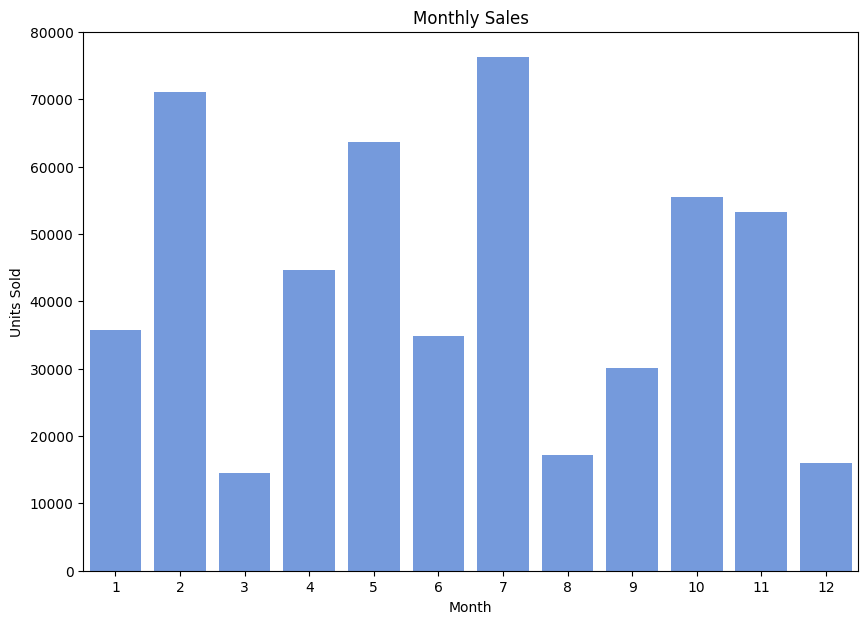

In [77]:
monthly_sales = amazon_data.groupby(['Month']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='Month', y='Units Sold' ,data=monthly_sales,color='cornflowerblue')
plt.title('Monthly Sales')
plt.show()

Observations:<br>

`High Sales Months`
- `February:` Approximately 75,000 units sold.
- `July:` The highest sales, close to 80,000 units sold.
- `October:` Approximately 70,000 units sold.<br>

`Moderate Sales Months`
- `June:` Approximately 65,000 units sold.
- `May:` Approximately 55,000 units sold.
- `April and November:` Both have sales around 50,000 units.
- `January:` Approximately 45,000 units sold.<br>

`Low Sales Months`
- `March:` The lowest sales month, with approximately 15,000 units sold.
- `August:` Approximately 25,000 units sold.
- `September and December:` Both have sales around 30,000 units.<br>

`General Observations`
- Sales are highest in February, July, and October, suggesting seasonal peaks or promotional events during these months.
- March shows a significant drop in sales, which may indicate a seasonal lull or the absence of major promotions.
- January, April, May, June, and November maintain moderate sales levels, indicating steady demand.
- August, September, and December have relatively lower sales, which might be due to seasonal trends or other factors affecting demand.<br>

These observations suggest a pattern of peaks and troughs in sales, possibly influenced by seasonal factors, marketing campaigns, or other external variables affecting consumer purchasing behavior throughout the year.

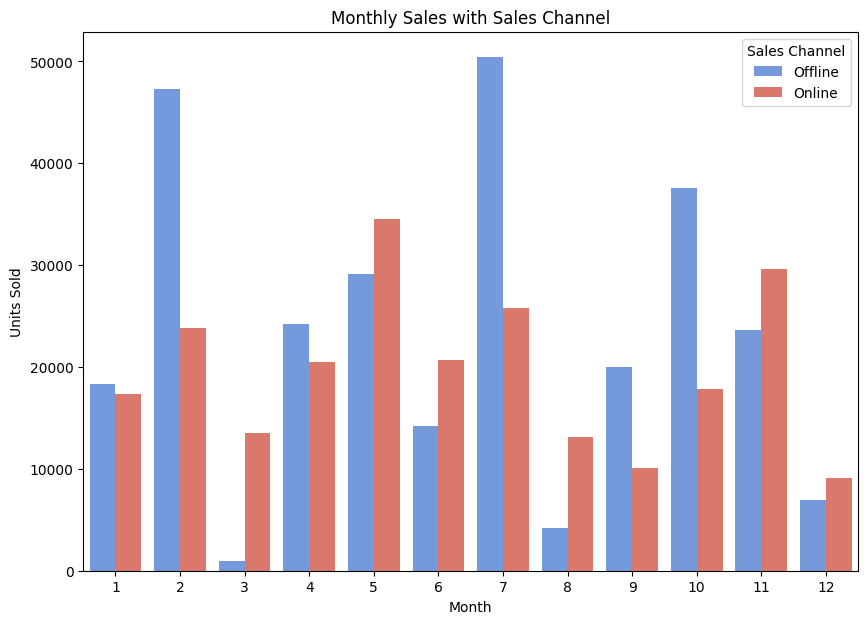

In [78]:
monthly_sales_with_channel = amazon_data.groupby(['Month','Sales Channel']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
cornflower_blue = "#6495ED"
matching_red = "#ED6A5A"
my_palette = sns.color_palette([cornflower_blue, matching_red])
sns.barplot(x='Month',y='Units Sold',data=monthly_sales_with_channel,hue='Sales Channel',palette=my_palette)
plt.title('Monthly Sales with Sales Channel')
plt.show()

`Overall Trends:`
- Offline sales generally dominate over online sales for most months, except for a few.
- There are significant variations in sales numbers across different months for both channels.<br>

`Monthly Breakdown:`

- `January (1):` Similar sales for both channels, with Offline slightly higher.
- `February (2):` Offline sales are significantly higher than Online sales.
- `March (3):` Online sales are minimal compared to Offline sales.
- `April (4):` Offline sales are again higher, with a noticeable amount of Online sales.
- `May (5):` Online sales peak and surpass Offline sales.
- `June (6):` Offline sales are higher than Online, but both have increased.
- `July (7):` Highest Offline sales of the year, with Online sales also being significant.
- `August (8):` Offline sales are considerably higher than Online sales.
- `September (9):` Online sales are minimal compared to Offline sales.
- `October (10):` Another peak month for Offline sales, with a noticeable amount of Online sales.
- `November (11):` Online sales surpass Offline sales.
- `December (12):` Both channels show lower sales compared to other months, with Online slightly higher than Offline.<br>

`Notable Peaks:`
- Offline sales peak in July and October.
- Online sales peak in May and November.<br>

`Low Sales Periods:`
- Online sales are lowest in March and September.
- Offline sales are lowest in March and December.<br>

`Comparative Analysis:`
- In May and November, Online sales outperform Offline sales.
- Offline sales dominate for the majority of the year.<br>

This visualization highlights the fluctuating nature of sales across different months and channels, suggesting possible seasonal trends or marketing influences.

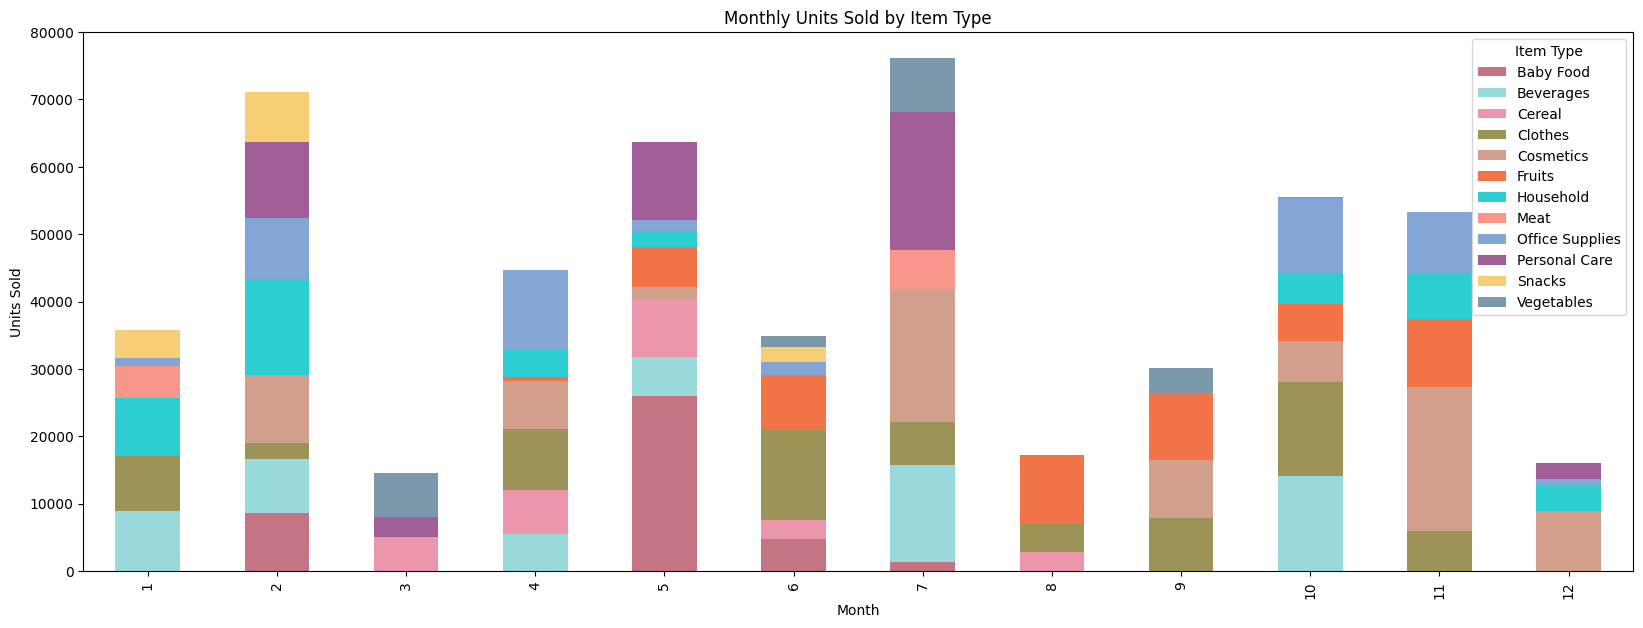

In [79]:
# Define base colors for generating pastel palettes
monthly_sales_with_item_type = amazon_data.groupby(['Month','Item Type']).sum(numeric_only=True)['Units Sold'].reset_index()
pivot_data = monthly_sales_with_item_type.pivot(index='Month', columns='Item Type', values='Units Sold')
pivot_data.plot(kind='bar', stacked=True, figsize=(20,7),color=base_colors)
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Monthly Units Sold by Item Type')
plt.legend(title='Item Type')
plt.show()


`Overall Trends:`
- The total units sold vary significantly across different months.
- There is a diverse range of item types sold each month.

`Monthly Breakdown:`
- `January (1):` High sales of Beverages, Snacks, Household items, and Clothes.
- `February (2):` Highest sales overall, with significant contributions from Beverages, Snacks, Household items, Office Supplies, and Personal Care.
- `March (3):` Lower sales, mainly Beverages, Cereal, Meat, and Vegetables.
- `April (4):` Moderate sales, primarily Household items, Clothes, Meat, and Vegetables.
- `May (5):` High sales, led by Household items, Meat, Beverages, Clothes, and Snacks.
- `June (6):` Lower sales compared to May, with Clothes, Beverages, Vegetables, and Meat being the main contributors.
- `July (7):` High sales, dominated by Beverages, Snacks, Household items, Personal Care, and Vegetables.
- `August (8):` Lower sales, mainly Beverages, Vegetables, Clothes, and Cereal.
- `September (9):` Moderate sales, primarily Fruits, Clothes, Beverages, and Vegetables.
- `October (10):` High sales, with significant contributions from Household items, Clothes, Beverages, Vegetables, and Fruits.
- `November (11):` Moderate sales, dominated by Household items, Clothes, Beverages, and Vegetables.
- `December (12):` Lower sales, mainly Cosmetics, Household items, Beverages, and Clothes.<br>

`Notable Peaks:`
- February and July show the highest overall sales.
- Beverages, Household items, and Snacks consistently contribute significantly to high sales months.<br>

`Low Sales Periods:`
- March and August show the lowest overall sales.
- Despite lower sales in these months, Beverages, Vegetables, and Clothes remain prominent.<br>

`Comparative Analysis of Item Types:`
- `Beverages:` High sales in February, May, July, and October.
- `Household items:` Consistently high in February, May, and October.
- `Snacks:` Notable in January, February, and July.
- `Clothes:` Prominent in January, April, June, and October.
- `Vegetables:` Steady sales throughout the year, with peaks in February, May, and July.
- `Personal Care:` Significant in February and July.<br>

The chart highlights the variability in sales for different item types across months, indicating potential seasonal trends or promotional influences.


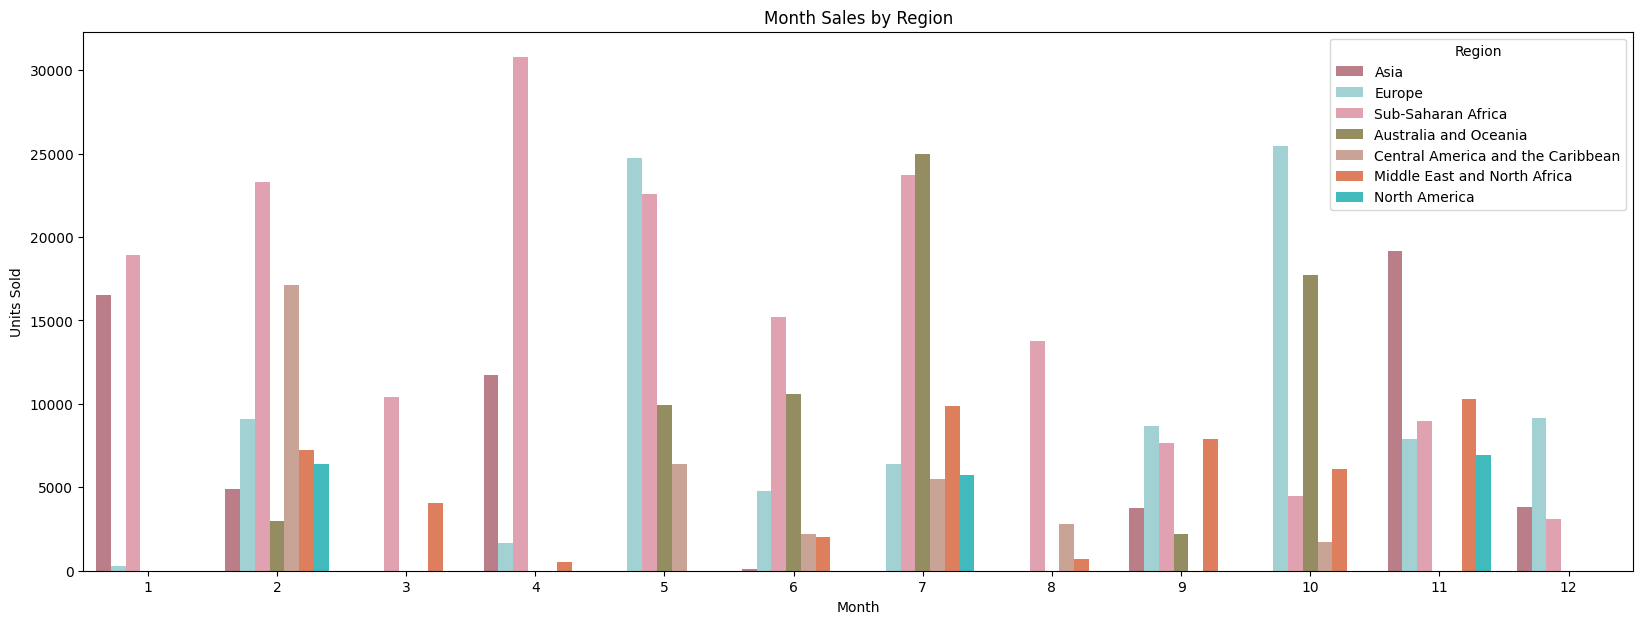

In [80]:
monthly_sales_with_region = amazon_data.groupby(['Month','Region']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x='Month',y='Units Sold',data=monthly_sales_with_region,hue='Region',palette=base_colors[:7])
plt.title('Month Sales by Region')
plt.show()

`Overall Trends:`
- Sales vary significantly across different months and regions.
- Some regions consistently show higher sales compared to others.<br>

`Monthly Breakdown:`
- `January (1):` High sales in Asia and Sub-Saharan Africa, moderate sales in Europe and North America.
- `February (2):` High sales in Sub-Saharan Africa, Central America and the Caribbean, moderate sales in Asia, and Europe.
- `March (3):` Moderate sales in Sub-Saharan Africa, Asia, and Central America and the Caribbean.
- `April (4):` High sales in Sub-Saharan Africa, Europe, and North America.
- `May (5):` High sales in Europe, Sub-Saharan Africa, and Australia and Oceania.
- `June (6):` Moderate sales in Sub-Saharan Africa, Australia and Oceania, and Asia.
- `July (7):` High sales in Sub-Saharan Africa, Australia and Oceania, and Europe.
- `August (8):` High sales in Sub-Saharan Africa, moderate sales in Asia and Europe.
- `September (9):` High sales in Europe and North America, moderate sales in Asia and the Middle East and North Africa.
- `October (10):` High sales in Europe and Australia and Oceania, moderate sales in Sub-Saharan Africa, and North America.
- `November (11):` High sales in Asia and Sub-Saharan Africa, moderate sales in the Middle East and North Africa, and North America.
- `December (12):` High sales in Europe and North America, moderate sales in Sub-Saharan Africa, and the Middle East and North Africa.<br>

`Notable Peaks:`
- Sub-Saharan Africa shows high sales in January, February, April, May, July, August, October, and November.
- Europe has high sales in April, May, July, September, October, and December.
- Asia has high sales in January, February, March, and November.<br>

`Low Sales Periods:`
- Central America and the Caribbean, and the Middle East and North Africa regions show consistently lower sales compared to other regions.<br>

`Comparative Analysis of Regions:`
- `Asia:` Peaks in January, February, March, and November.
- `Europe:` Peaks in April, May, July, September, October, and December.
- `Sub-Saharan Africa:` Peaks in multiple months, indicating strong overall performance.
- `Australia and Oceania:` High sales in February, May, July, and October.
- `North America:` Peaks in April, September, October, and December.
- `Central America and the Caribbean:` Highest in February, with moderate sales in March and June.
- `Middle East and North Africa:` Moderate sales in February, May, September, November, and December.<br>

The chart highlights the variability in sales performance across different regions and months, indicating potential market preferences or seasonal trends.

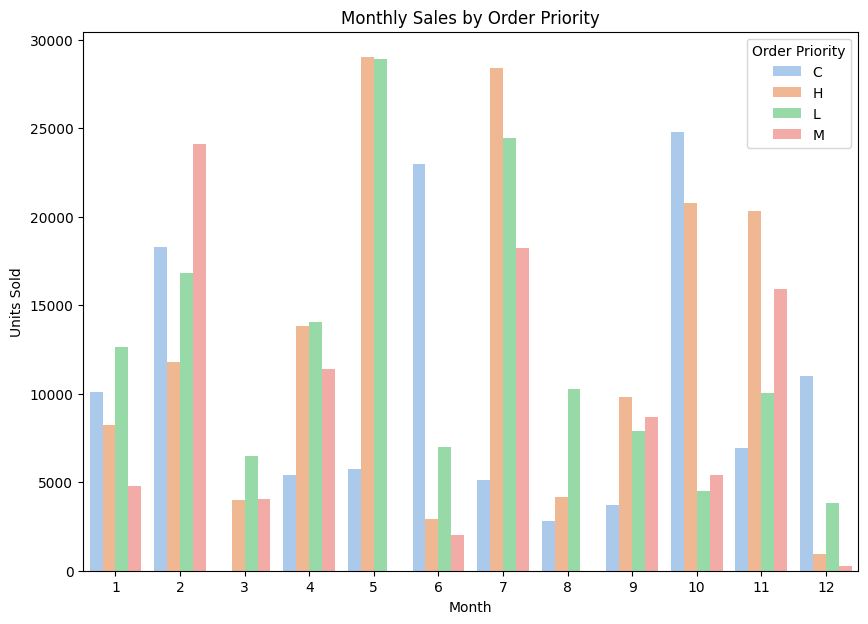

In [81]:
monthly_sales_with_priority = amazon_data.groupby(['Month','Order Priority']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='Month',y='Units Sold',data=monthly_sales_with_priority,hue='Order Priority',palette='pastel')
plt.title('Monthly Sales by Order Priority')
plt.show()

`Overall Trends:`
- Sales vary significantly across different months and order priorities.
- `H` priority orders consistently show higher sales compared to others.<br>

`Monthly Breakdown:`
- `January (1):` Moderate sales for `L` and `H`, lower sales for `C` and `M`.
- `February (2):` High sales for `M`, moderate for `C` and `L`, lower for `H`.
- `March (3):` Moderate sales for `L` and 'H', lower for 'C' and 'M'.
- `April (4):` High sales for `H`, moderate for `L` and `M`, lower for `C`.
- `May (5):` High sales for `H` and `L`, moderate for `C`, lower for `M`.
- `June (6):` Very high sales for `H`, moderate for `L`, lower for `C` and `M`.
- `July (7):` High sales for `H`, moderate for `L`, lower for `C` and `M`.
- `August (8):` Moderate sales for `L` and `H`, lower for `C` and `M`.
- `September (9):` High sales for `H`, moderate for `C`, `L`, and `M`.
- `October (10):` High sales for `H`, moderate for `L` and `M`, lower for `C`.
- `November (11):` High sales for `H`, moderate for `L` and `M`, lower for `C`.
- `December (12):` High sales for `H`, moderate for `C`, `L`, and `M`.<br>

`Notable Peaks:`
- `H` priority shows high sales in April, May, June, July, September, October, November, and December.
- `M` priority shows high sales in February and December.
- `L` priority shows high sales in May and June.<br>

`Low Sales Periods:`
- `C` priority shows consistently lower sales across most months.
- Sales for `M` priority are lower in many months except for a peak in February.<br>

`Comparative Analysis of Order Priorities:`
- `H`: Peaks in April, May, June, July, September, October, November, and December.
- `M`: Peaks in February and December.
- `L`: Peaks in May and June.
- `C`: Consistently lower sales compared to other priorities.<br>

The chart highlights the variability in sales performance across different months and order priorities, indicating potential market preferences or seasonal trends.

## **Yearly Data Analysis**

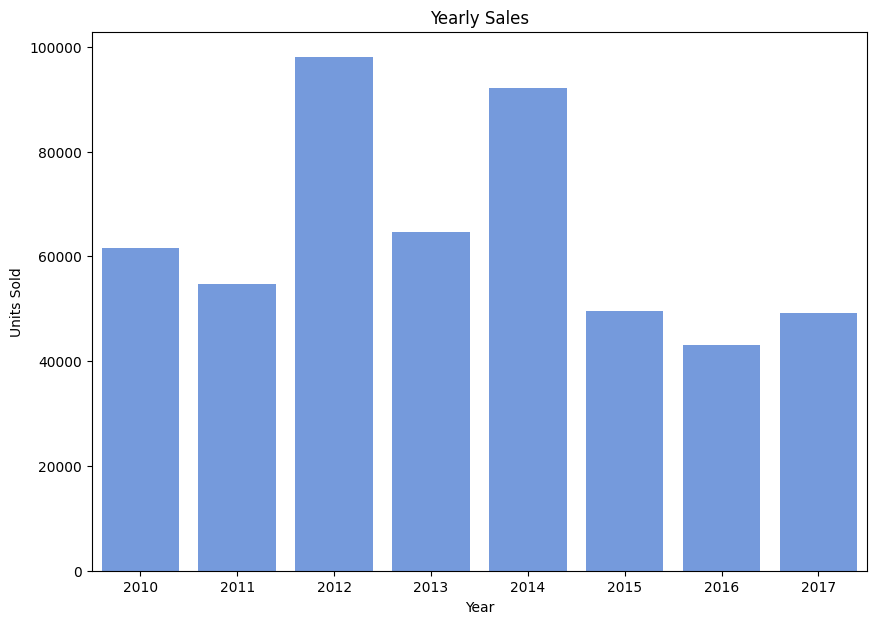

In [82]:
yearly_sales = amazon_data.groupby('Year').sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='Year',y='Units Sold',data=yearly_sales,color='cornflowerblue')
plt.title('Yearly Sales')
plt.show()

`Overall Trends:`
- Sales show significant variation over the years.
- Peaks and troughs are evident, indicating periods of high and low sales.<br>

`Yearly Breakdown:`
- `2010:` Sales are around 65,000 units.
- `2011:` Sales decrease slightly to about 60,000 units.
- `2012:` Sales peak significantly at approximately 100,000 units.
- `2013:` Sales decrease to around 70,000 units.
- `2014:` Another peak, though slightly lower than 2012, at around 90,000 units.
- `2015:` Sales drop to about 60,000 units.
- `2016:` The lowest sales year in this period, with around 50,000 units.
- `2017:` A slight recovery with sales at approximately 55,000 units.<br>

`Notable Peaks:`
- `2012:` The highest sales year with approximately 100,000 units.
- `2014:` Another high sales year with around 90,000 units.<br>

`Low Sales Periods:`
- `2011:` A slight dip following 2010.
- `2015:` A noticeable drop from the peak in 2014.
- `2016:` The lowest sales year in the given period.
- `2017:` Although there's a slight recovery from 2016, sales remain relatively low.<br>

`Comparative Analysis of Years:`
- `2010 and 2011:` Sales are steady but not as high as the peaks in 2012 and 2014.
- `2012 and 2014:` Stand out as the peak years with the highest sales.
- `2015-2017:` Show a decline in sales, with 2016 being the lowest, but a slight improvement in 2017.<br>

The chart highlights significant fluctuations in sales over the years, with notable peaks in 2012 and 2014 and a pronounced dip in 2016. These variations could be indicative of market conditions, product demand, or other external factors influencing sales performance.

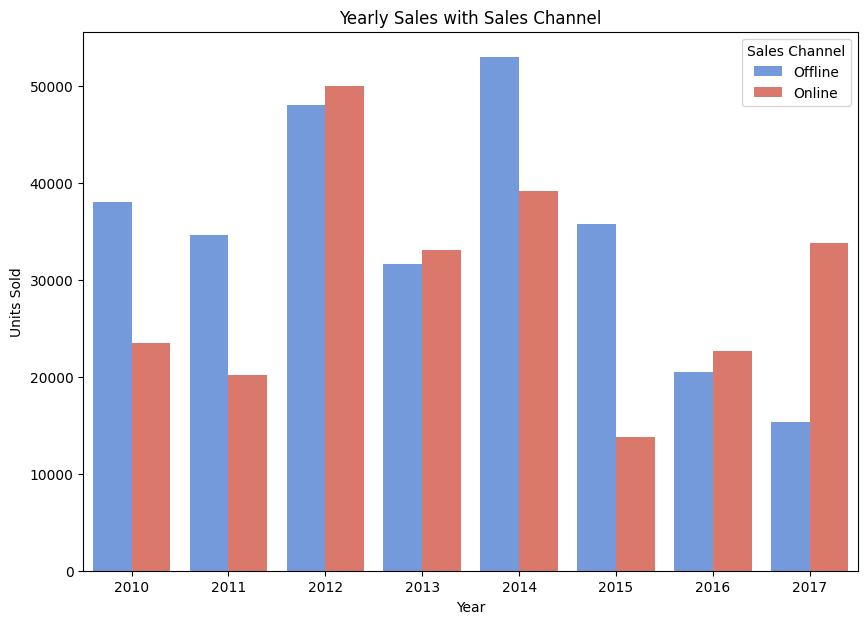

In [83]:
yearly_sales_with_channel = amazon_data.groupby(['Year','Sales Channel']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(10,7))
cornflower_blue = "#6495ED"
matching_red = "#ED6A5A"
my_palette = sns.color_palette([cornflower_blue, matching_red])
sns.barplot(x='Year',y='Units Sold',data=yearly_sales_with_channel,hue='Sales Channel',palette=my_palette)
plt.title('Yearly Sales with Sales Channel')
plt.show()

`Overall Trends:`
- Both online and offline sales show significant variation over the years.
- Online sales are generally lower than offline sales until 2014, after which online sales start to surpass offline sales in certain years.<br>

`Yearly Breakdown:`
- `2010:`
  - Offline: ~45,000 units
  - Online: ~25,000 units
- `2011:`
  - Offline: ~40,000 units
  - Online: ~20,000 units
- `2012:`
  - Offline: ~55,000 units
  - Online: ~45,000 units
- `2013:`
  - Offline: ~35,000 units
  - Online: ~35,000 units
- `2014:`
  - Offline: ~55,000 units
  - Online: ~45,000 units
- `2015:`
  - Offline: ~40,000 units
  - Online: ~30,000 units
- `2016:`
  - Offline: ~25,000 units
  - Online: ~30,000 units
- `2017:`
  - Offline: ~20,000 units
  - Online: ~35,000 units<br>
  
`Notable Peaks:`
- `2012:` Highest overall sales year with offline sales around 55,000 units and online sales around 45,000 units.
- `2014:` Another high sales year with offline sales around 55,000 units and online sales around 45,000 units.<br>

`Low Sales Periods:`
- `2016:` Offline sales are the lowest (~25,000 units), while online sales are around 30,000 units.
- `2017:` Offline sales continue to decline (~20,000 units), but online sales show an increase (~35,000 units).<br>

`Comparative Analysis of Sales Channels:`
- `Offline Sales:`
  - Peak years: 2012 and 2014 (~55,000 units each)
  - Lowest years: 2016 and 2017 (~25,000 and ~20,000 units respectively)
- `Online Sales:`
  - Steady growth from 2010 to 2014, peaking in 2012 and 2014 (~45,000 units each)
  - Higher than offline sales in 2016 and 2017 (~30,000 and ~35,000 units respectively)<br>

The chart highlights significant fluctuations in both offline and online sales over the years. Offline sales peaked in 2012 and 2014 but saw a notable decline from 2015 onwards. In contrast, online sales showed consistent growth, surpassing offline sales in 2016 and 2017, indicating a shift in consumer buying behavior towards online platforms.

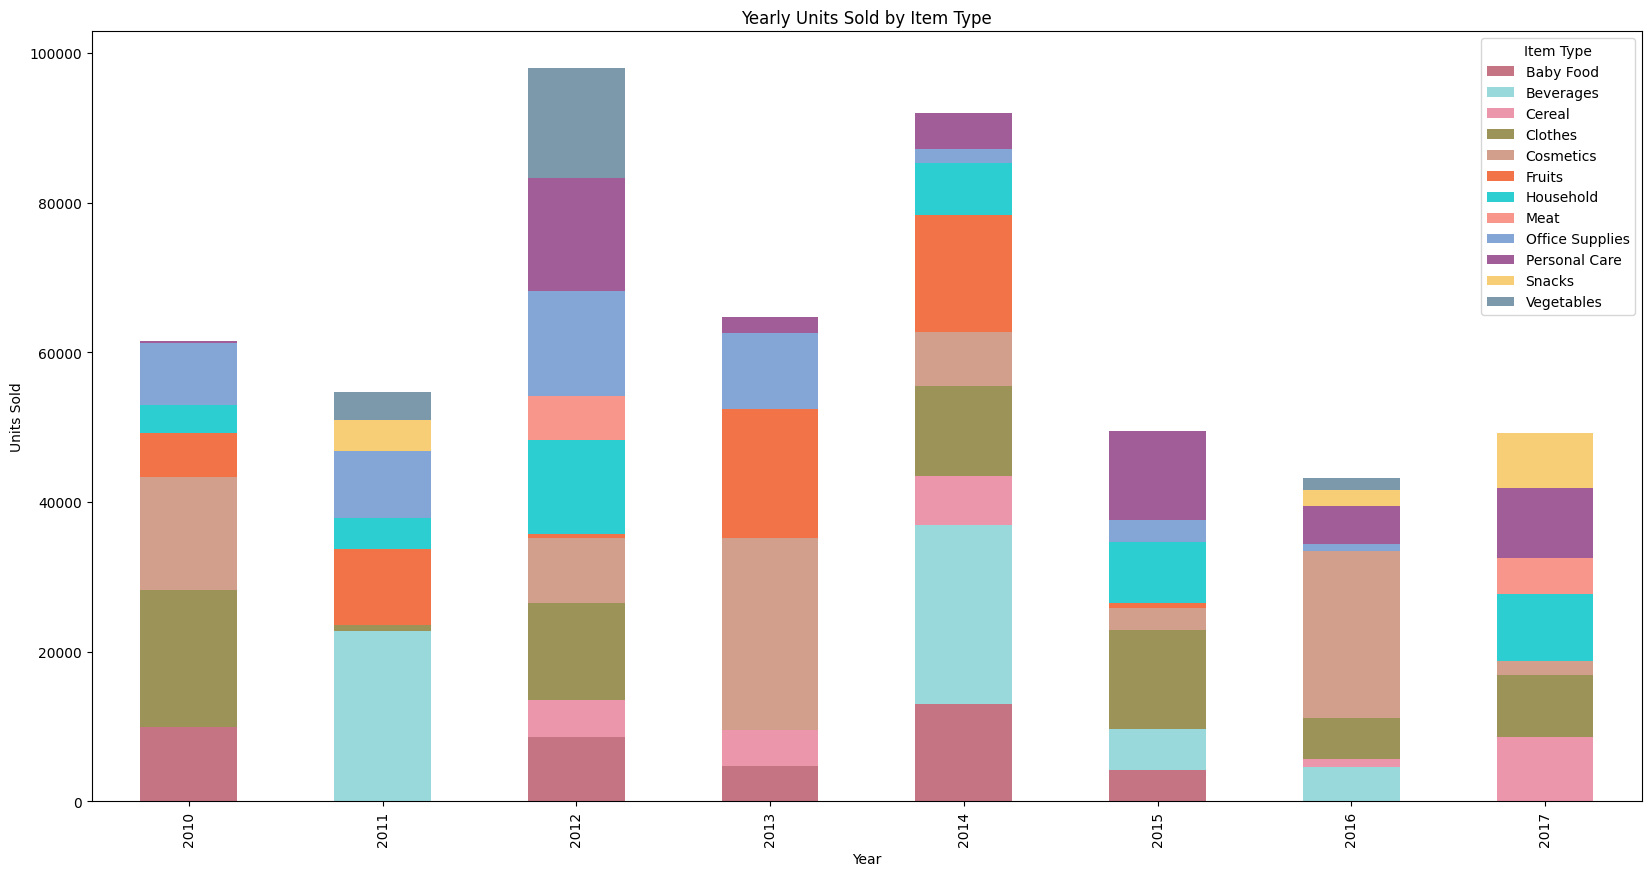

In [84]:
yearly_sales_with_item_type = amazon_data.groupby(['Year','Item Type']).sum(numeric_only=True)['Units Sold'].reset_index()
base_colors = ["#C47482", "#9AD9DB", "#EB96AA", "#9C9359", "#D29F8C", 
               "#F27348", "#2CCED2", "#F9968B", "#84A6D6", "#A15D98", 
               "#F7CE76", "#7C98AB"]
pivot_data = yearly_sales_with_item_type.pivot(index='Year', columns='Item Type', values='Units Sold')
pivot_data.plot(kind='bar', stacked=True, figsize=(20,10),color=base_colors)
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.title('Yearly Units Sold by Item Type')
plt.legend(title='Item Type')
plt.show()


`Overall Trends:`
- The total units sold vary significantly across different years.
- There is a diverse range of item types sold each year.<br>

`Yearly Breakdown:`
- `2010:` High sales of Vegetables, Household items, Cosmetics, and Clothes.
- `2011:` Lower overall sales, with significant contributions from Vegetables, Household items, and Clothes.
- `2012:` Highest sales overall, with significant contributions from Vegetables, Clothes, and Household items.
- `2013:` High sales, dominated by Vegetables, Clothes, and Cosmetics.
- `2014:` Moderate sales, primarily of Household items, Clothes, and Vegetables.
- `2015:` High sales, led by Clothes, Vegetables, Household items, and Fruits.
- `2016:` Lower sales compared to 2015, with Household items, Vegetables, and Clothes being the main contributors.
- `2017:` Moderate sales, dominated by Personal Care, Clothes, and Vegetables.<br>

`Notable Peaks:`
- 2012 and 2013 show the highest overall sales.
- Vegetables, Clothes, and Household items consistently contribute significantly to high sales years.<br>

`Low Sales Periods:`
- 2011 and 2016 show the lowest overall sales.
- Despite lower sales in these years, Vegetables, Household items, and Clothes remain prominent.<br>

`Comparative Analysis of Item Types:`
- `Vegetables:` High sales in 2010, 2011, 2012, and 2013.
- `Household items:` Consistently high in 2010, 2011, and 2012.
- `Clothes:` Notable in 2010, 2011, 2012, and 2015.
- `Cosmetics:` Prominent in 2010, 2012, and 2013.
- `Fruits:` Steady sales in 2015 and 2017.
- `Personal Care:` Significant in 2017.<br>

The chart highlights the variability in sales for different item types across years, indicating potential market trends, consumer preferences, or promotional influences.

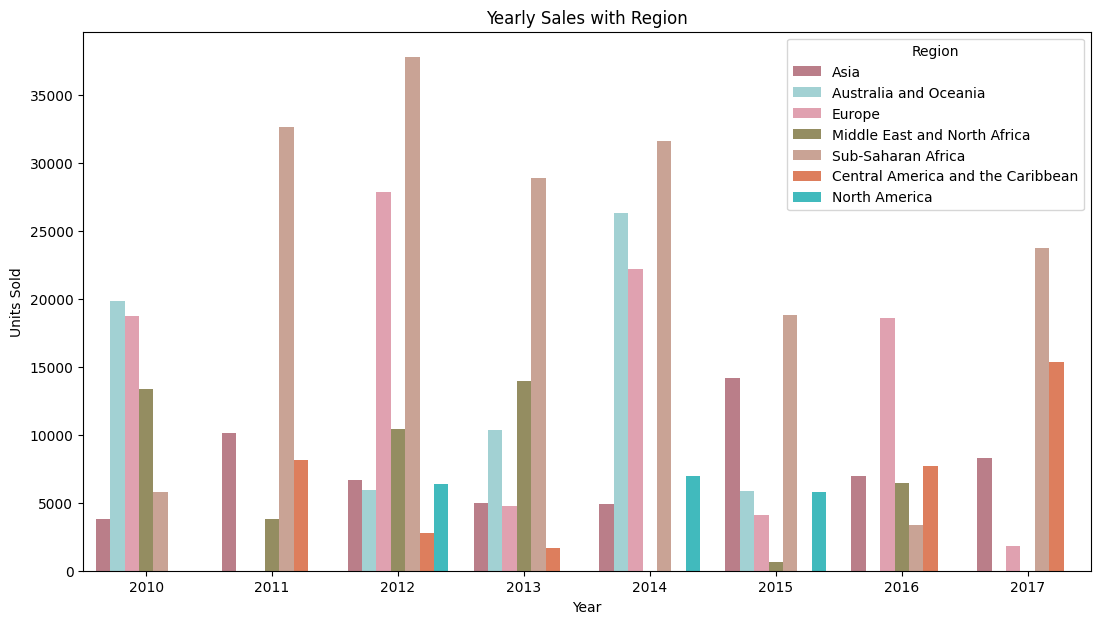

In [85]:
yearly_sales_with_region = amazon_data.groupby(['Year','Region']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(13,7))
sns.barplot(x='Year',y='Units Sold',data=yearly_sales_with_region,hue='Region',palette=base_colors[:7])
plt.title('Yearly Sales with Region')
plt.show()

`Overall Trends:`
- Sales vary significantly across different years and regions.
- Some regions consistently show higher sales compared to others.<br>

`Yearly Breakdown:`
- `2010:` High sales in North America and Europe, moderate sales in Asia and Middle East and North Africa.
- `2011:` High sales in Sub-Saharan Africa, moderate sales in Europe, Central America and the Caribbean.
- `2012:` High sales in Sub-Saharan Africa and Europe, moderate sales in Asia and North America.
- `2013:` High sales in Sub-Saharan Africa and North America, moderate sales in Europe and Middle East and North Africa.
- `2014:` High sales in North America and Sub-Saharan Africa, moderate sales in Europe and Asia.
- `2015:` High sales in Sub-Saharan Africa, moderate sales in Europe and North America.
- `2016:` High sales in Europe and Sub-Saharan Africa, moderate sales in Asia and Central America and the Caribbean.
- `2017:` High sales in Sub-Saharan Africa and Central America and the Caribbean, moderate sales in Europe and North America.<br>

`Notable Peaks:`
- Sub-Saharan Africa shows high sales in multiple years, indicating strong overall performance.
- Europe has high sales consistently in 2012, 2016.
- North America shows high sales in 2010, 2013, 2014.
- Central America and the Caribbean show a significant peak in 2017.<br>

`Low Sales Periods:`
- Central America and the Caribbean, and the Middle East and North Africa regions show consistently lower sales compared to other regions.<br>

`Comparative Analysis of Regions:`
- `Asia:` Peaks in 2012, 2016, and moderate sales in other years.
- `Europe:` Peaks in 2012, 2016, and moderate sales in multiple years.
- `Sub-Saharan Africa:` Peaks in multiple years, indicating strong overall performance.
- `Australia and Oceania:` Consistent moderate sales across most years.
- `North America:` Peaks in 2010, 2013, 2014.
- `Central America and the Caribbean:` Highest in 2017, with moderate sales in 2011.
- `Middle East and North Africa:` Moderate sales in 2010, 2013, 2016, and 2017.<br>

The chart highlights the variability in sales performance across different regions and years, indicating potential market preferences or trends.

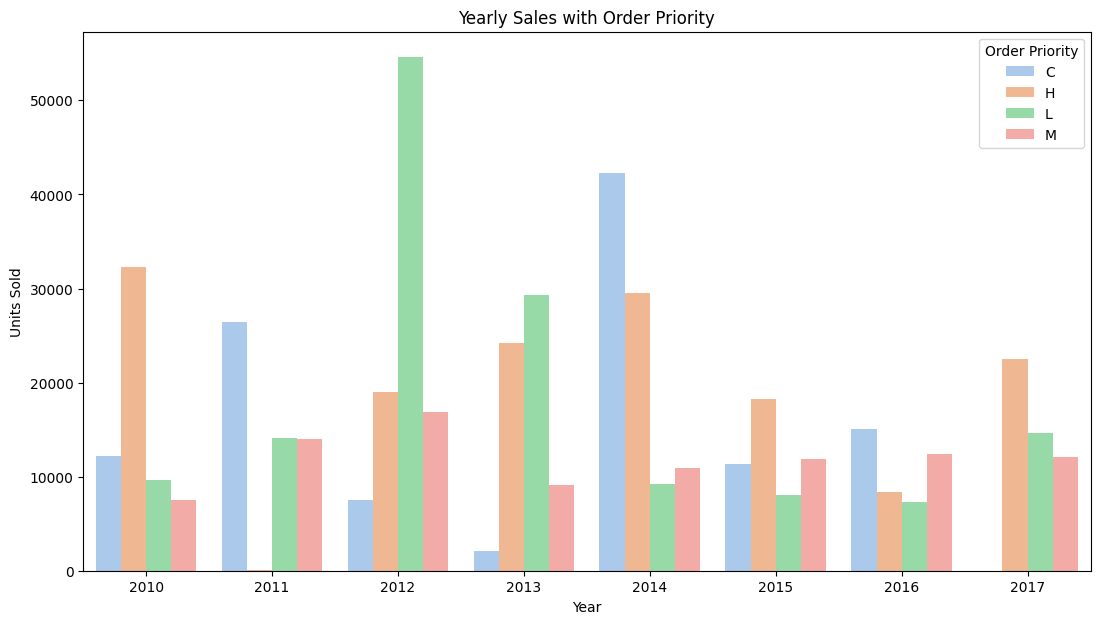

In [86]:
yearly_sales_with_priority = amazon_data.groupby(['Year','Order Priority']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(13,7))
sns.barplot(x='Year',y='Units Sold',data=yearly_sales_with_priority,hue='Order Priority',palette='pastel')
plt.title('Yearly Sales with Order Priority')
plt.show()

`Overall Trends:`
- Sales vary significantly across different years and order priorities.
- Some order priorities consistently show higher sales compared to others.<br>

`Yearly Breakdown:`
- `2010:` High sales for High (H) priority, moderate sales for Critical (C) and Medium (M) priorities.
- `2011:` High sales for Critical (C) priority, moderate sales for Low (L) and Medium (M) priorities.
- `2012:` High sales for Low (L) and High (H) priorities, moderate sales for Medium (M) priority.
- `2013:` High sales for Critical (C) and Low (L) priorities, moderate sales for High (H) and Medium (M) priorities.
- `2014:` High sales for Critical (C) and High (H) priorities, moderate sales for Medium (M) priority.
- `2015:` High sales for High (H) priority, moderate sales for Critical (C) and Medium (M) priorities.
- `2016:` High sales for Critical (C) priority, moderate sales for High (H) and Medium (M) priorities.
- `2017:` High sales for High (H) priority, moderate sales for Low (L) and Medium (M) priorities.<br>

`Notable Peaks:`
- High (H) priority shows high sales in 2010, 2012, 2014, 2015, and 2017.
- Low (L) priority shows a significant peak in 2012.
- Critical (C) priority has high sales in 2011, 2013, 2014, and 2016.<br>

`Low Sales Periods:`
- Medium (M) priority shows consistently lower sales compared to other priorities, except for 2012.<br>

`Comparative Analysis of Order Priorities:`
- `Critical (C):` Peaks in 2011, 2013, 2014, and 2016.
- `High (H):` Peaks in 2010, 2012, 2014, 2015, and 2017, indicating strong overall performance.
- `Low (L):` Peaks in 2012, with moderate sales in multiple years.
- `Medium (M):` Moderate sales in 2012, consistently lower sales in other years.<br>

The chart highlights the variability in sales performance across different order priorities and years, indicating potential market preferences or trends.

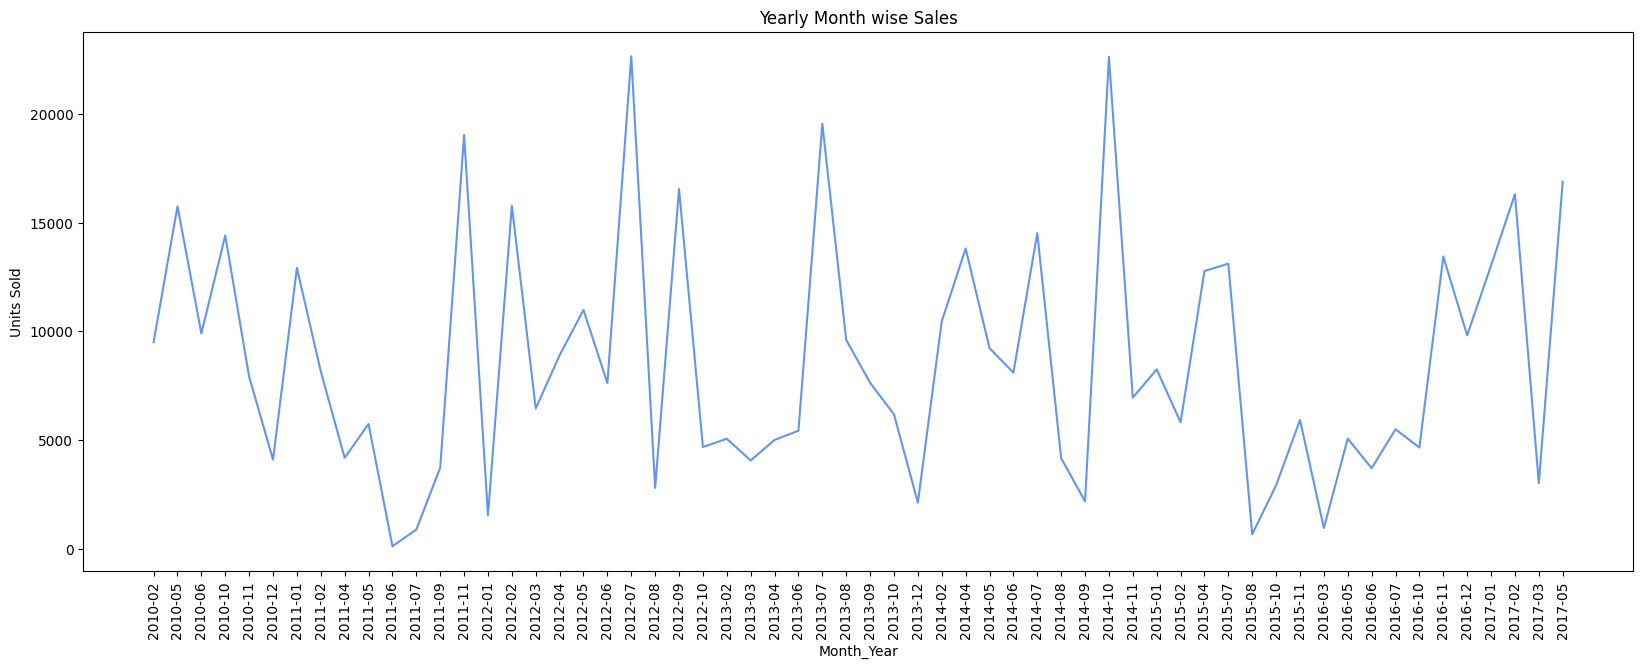

In [87]:
yearly_month_sales = amazon_data.groupby('Month_Year').sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(20,7))
sns.lineplot(x='Month_Year',y='Units Sold',data=yearly_month_sales,color='cornflowerblue')
plt.xticks(rotation='vertical')
plt.title('Yearly Month wise Sales')
plt.show()

`Overall Trends:`
- Sales fluctuate significantly on a month-to-month basis.
- There are noticeable peaks and troughs throughout the timeline.<br>

`Monthly Breakdown:`
- `2010:`
  - `February:` Moderate sales.
  - `May to December:` High sales in May, June, October, and December.
- `2011:`
  - `January to December:` Peaks in February, May, and November, with notable dips in June and September.
- `2012:`
  - `January to December:` High sales in February, April, and August, with sharp declines in March, May, and July.
- `2013:`
  - `January to December:` Peaks in March, May, and July, with dips in April, June, and August.
- `2014:`
  - `January to December:` Peaks in February, April, July, and October, with dips in March, June, and September.
- `2015:`
  - `January to August:` Peaks in February, May, and July, with dips in March, June, and August.
- `2016:`
  - `January to December:` Moderate sales throughout, with peaks in February, June, and October.
- `2017:`
  - `January to May:` High sales in February, March, and May, with a dip in April.<br>

`Notable Peaks:`
- `2010:` High sales in May, June, October, and December.
- `2011:` Peaks in February, May, and November.
- `2012:` High sales in February, April, and August.
- `2013:` Peaks in March, May, and July.
- `2014:` Peaks in February, April, July, and October.
- `2015:` Peaks in February, May, and July.
- `2016:` Peaks in February, June, and October.
- `2017:` Peaks in February, March, and May.<br>

`Low Sales Periods:`
- `2011:` Low sales in June and September.
- `2012:` Sharp declines in March, May, and July.
- `2013:` Dips in April, June, and August.
- `2014:` Dips in March, June, and September.
- `2015:` Dips in March, June, and August.<br>

`Comparative Analysis:`
- `High Sales Periods:` February appears to be a consistently high sales month across multiple years.
- `Low Sales Periods:` June often shows a dip in sales, indicating a potential trend.<br>

The chart highlights the variability in sales performance across different months and years, indicating potential market preferences or seasonal trends.

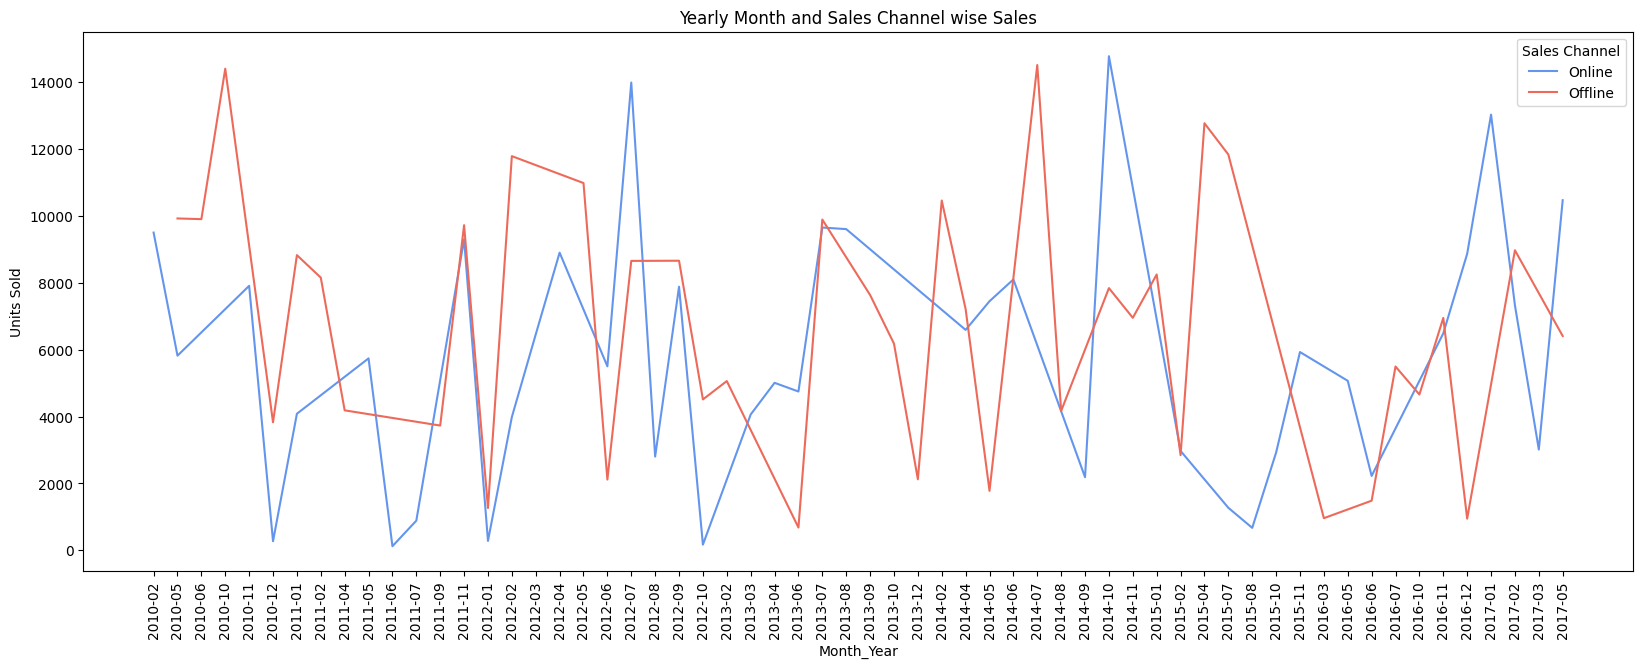

In [88]:
yearly_month_sales = amazon_data.groupby(['Month_Year','Sales Channel']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(20,7))
sns.lineplot(x='Month_Year',y='Units Sold',data=yearly_month_sales,palette=my_palette,hue='Sales Channel')
plt.xticks(rotation='vertical')
plt.title('Yearly Month and Sales Channel wise Sales')
plt.show()

`Overall Trends`
- `Sales Fluctuations:` Sales fluctuate significantly on a month-to-month basis, indicating variable market conditions or seasonal demand.
- `Peaks and Troughs:` Noticeable peaks and troughs throughout the timeline show irregular sales patterns for both Online and Offline channels.<br>

`Monthly Breakdown by Sales Channel`
- `2010`
  - `Online:`
    - Moderate sales in February.
    - High sales in May and June.
    - Decrease from July to December, with peaks in October and December.
  - `Offline:`
    - High sales in February and April.
    - Decline in May and August.
    - Increase again in September and October.
- `2011`
  - `Online:`
    - Peaks in January, March, and May.
    - Dips in February, April, June, and September.
  - `Offline:`
    - Peaks in February, May, and November.
    - Dips in June and September.
- `2012`
  - `Online:`
    - High sales in January and April.
    - Sharp declines in March, May, and July.
  - `Offline:`
    - Peaks in February, April, and August.
    - Dips in January, March, May, and July.
- `2013`
  - `Online:`
    - Peaks in March, May, and July.
    - Dips in January, April, June, and August.
  - `Offline:`
    - Peaks in March, May, and July.
    - Dips in April, June, and August.
- `2014`
  - `Online:`
    - Peaks in February, April, and July.
    - Dips in January, March, June, and September.
  - `Offline:`
    - Peaks in January, February, July, and October.
    - Dips in March, June, and September.
- `2015`
  - `Online:`
    - Peaks in February, May, and July.
    - Dips in January, March, June, and August.
  - `Offline:`
    - Peaks in January, February, and May.
    - Dips in March, June, and August.
- `2016`
  - `Online:`
    - Peaks in February, June, and October.
    - Dips in January, March, April, and August.
  - `Offline:`
    - Peaks in January, February, and November.
    - Dips in March, May, July, and September.
- `2017`
  - `Online:`
    - High sales in February, March, and May.
    - Dip in April.
  - `Offline:`
    - Peaks in January, February, and April.
    - Dip in March and May.<br>
    
`Notable Peaks`
  - `Online:`
    - Consistent peaks in February across multiple years.
    - Other high sales periods in May, June, and October.
  - `Offline:`
    - Frequent peaks in February, May, and July.
    - Notable high sales in November (2011) and October (2014).<br>

`Low Sales Periods`
  - `Online:`
    - Frequent dips in March, June, and August.
    - Notable low sales in June and September (2011).
  - `Offline:`
    - Consistent dips in March, June, and August.
    - Sharp declines in September (2011) and July (2012).<br>

`Comparative Analysis`
- `High Sales Periods:`
    - Both Online and Offline channels show consistently high sales in February.
    - Other notable high sales periods vary between the two channels but include May and July.
- `Low Sales Periods:`
    - June often shows a dip in sales for both channels, indicating a potential trend.
    - March and August also frequently exhibit lower sales across both channels.<br>

The chart highlights the variability in sales performance across different months and years for both Online and Offline channels. February is a consistently high sales month for both channels, suggesting a potential seasonal trend. June often shows a dip in sales, indicating a lower demand period. Both channels show significant irregularities, reflecting varied market conditions and potential external influences on sales patterns.

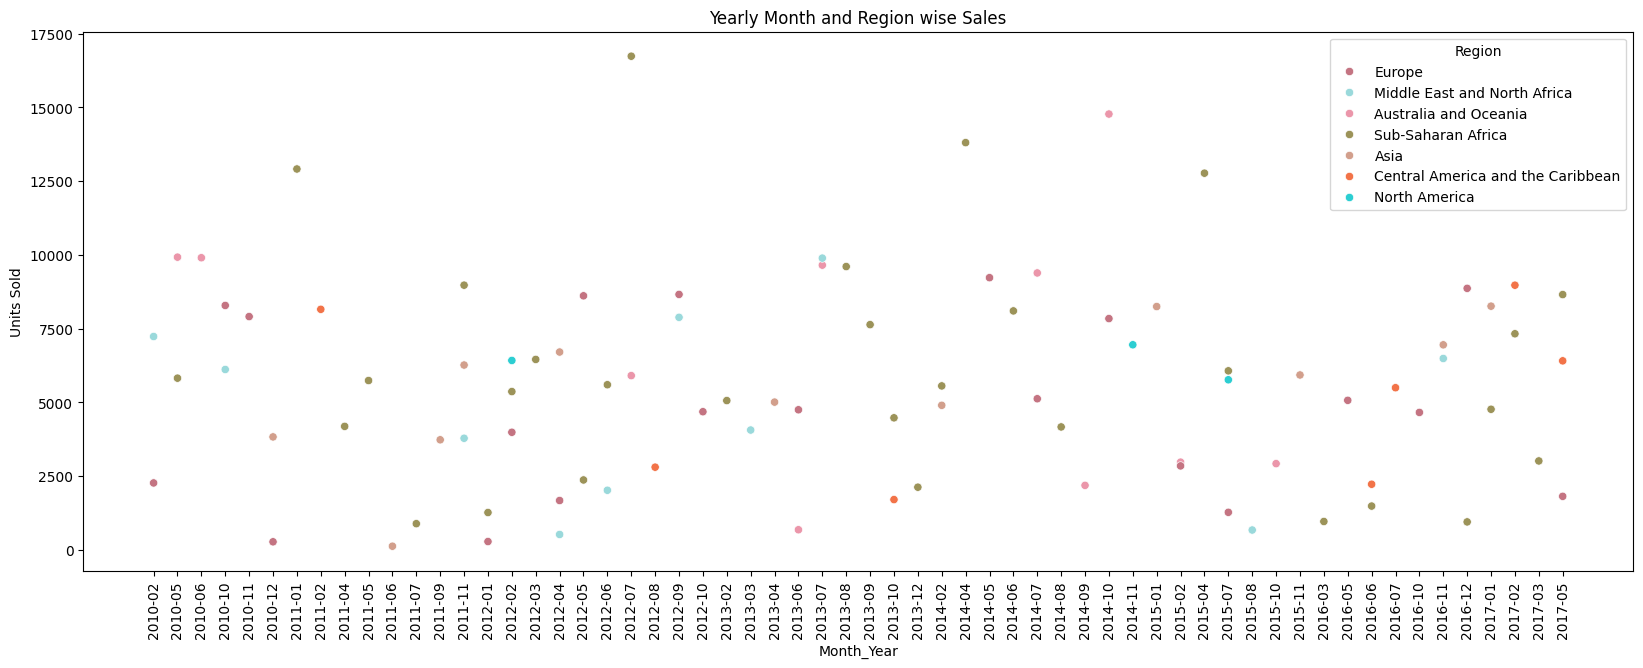

In [89]:
yearly_month_sales = amazon_data.groupby(['Month_Year','Region']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(20,7))
sns.scatterplot(x='Month_Year',y='Units Sold',data=yearly_month_sales,palette=base_colors[:7],hue='Region')
plt.xticks(rotation='vertical')
plt.title('Yearly Month and Region wise Sales')
plt.show()

`Overall Trends`
- `Sales Distribution:` Sales are spread across various regions with no clear overall trend indicating uniform growth or decline.
- `Peak Sales:` Some months exhibit higher sales compared to others, suggesting periodic spikes in demand.<br>

`Monthly Breakdown by Region`
- `2010`
  - `Europe:` Moderate sales across most months.
  - `Middle East and North Africa:` Consistent moderate sales.
  - `Australia and Oceania:` Low to moderate sales.
  - `Sub-Saharan Africa:` Low to moderate sales with occasional peaks.
  - `Asia:` High sales in some months (e.g., mid-2010).
  - `Central America and the Caribbean:` Moderate sales in specific months.
  - `North America:` Moderate to high sales, especially towards the end of the year.
- `2011`
  - `Europe:` Moderate sales with occasional peaks.
  - `Middle East and North Africa:` Low to moderate sales with fluctuations.
  - `Australia and Oceania:` Low sales.
  - `Sub-Saharan Africa:` Moderate sales with occasional peaks.
  - `Asia:` Moderate sales with a few high sales months.
  - `Central America and the Caribbean:` Low to moderate sales.
  - `North America:` Moderate to high sales.
- `2012`
  - `Europe:` Moderate sales with a few high sales months.
  - `Middle East and North Africa:` Low to moderate sales.
  - `Australia and Oceania:` Low sales.
  - `Sub-Saharan Africa:` Moderate sales with a high sales peak mid-year.
  - `Asia:` Consistently moderate to high sales.
  - `Central America and the Caribbean:` Moderate sales.
  - `North America:` Moderate sales with a high peak towards the end of the year.
- `2013`
  - `Europe:` Moderate sales with some high sales months.
  - `Middle East and North Africa:` Low to moderate sales.
  - `Australia and Oceania:` Low sales.
  - `Sub-Saharan Africa:` Moderate sales with peaks in the middle of the year.
  - `Asia:` Moderate to high sales throughout the year.
  - `Central America and the Caribbean:` Low to moderate sales.
  - `North America:` Moderate sales with peaks in the middle and end of the year.
- `2014`
  - `Europe:` Moderate sales with a few peaks.
  - `Middle East and North Africa:` Low to moderate sales.
  - `Australia and Oceania:` Low sales.
  - `Sub-Saharan Africa:` Moderate to high sales in several months.
  - `Asia:` Moderate to high sales with several peaks.
  - `Central America and the Caribbean:` Low to moderate sales.
  - `North America:` Moderate sales with occasional high sales months.
- `2015`
  - `Europe:` Moderate sales with a few high peaks.
  - `Middle East and North Africa:` Low to moderate sales.
  - `Australia and Oceania:` Low sales.
  - `Sub-Saharan Africa:` Moderate sales with a few high sales peaks.
  - `Asia:` Moderate to high sales throughout the year.
  - `Central America and the Caribbean:` Low to moderate sales.
  - `North America:` Moderate sales with peaks at the beginning and middle of the year.
- `2016`
  - `Europe:` Moderate sales with a few peaks.
  - `Middle East and North Africa:` Low to moderate sales.
  - `Australia and Oceania:` Low sales.
  - `Sub-Saharan Africa:` Moderate to high sales in several months.
  - `Asia:` Consistently moderate to high sales.
  - `Central America and the Caribbean:` Low to moderate sales.
  - `North America:` Moderate sales with high peaks towards the end of the year.
- `2017`
  - `Europe:` Moderate sales with peaks in some months.
  - `Middle East and North Africa:` Low to moderate sales.
  - `Australia and Oceania:` Low sales.
  - `Sub-Saharan Africa:` Moderate to high sales.
  - `Asia:` Moderate to high sales.
  - `Central America and the Caribbean:` Moderate sales.
  - `North America:` High sales in several months.<br>

`Notable Peaks and Lows`
- `Europe:` Peaks scattered throughout the timeline.
- `Middle East and North Africa:` Consistent low to moderate sales.
- `Australia and Oceania:` Generally low sales.
- `Sub-Saharan Africa:` Occasional high sales peaks.
- `Asia:` Regular moderate to high sales, with notable peaks in 2010, 2013, and 2016.
- `Central America and the Caribbean:` Low to moderate sales.
- `North America:` Consistently moderate to high sales, with peaks towards the end of several years.<br>

The scatter plot indicates variability in sales performance across different regions and time periods. Asia and North America tend to have higher sales peaks compared to other regions. Sales trends show occasional spikes in demand, reflecting possible seasonal or market influences. The chart emphasizes the diverse market conditions and sales performances across the globe.

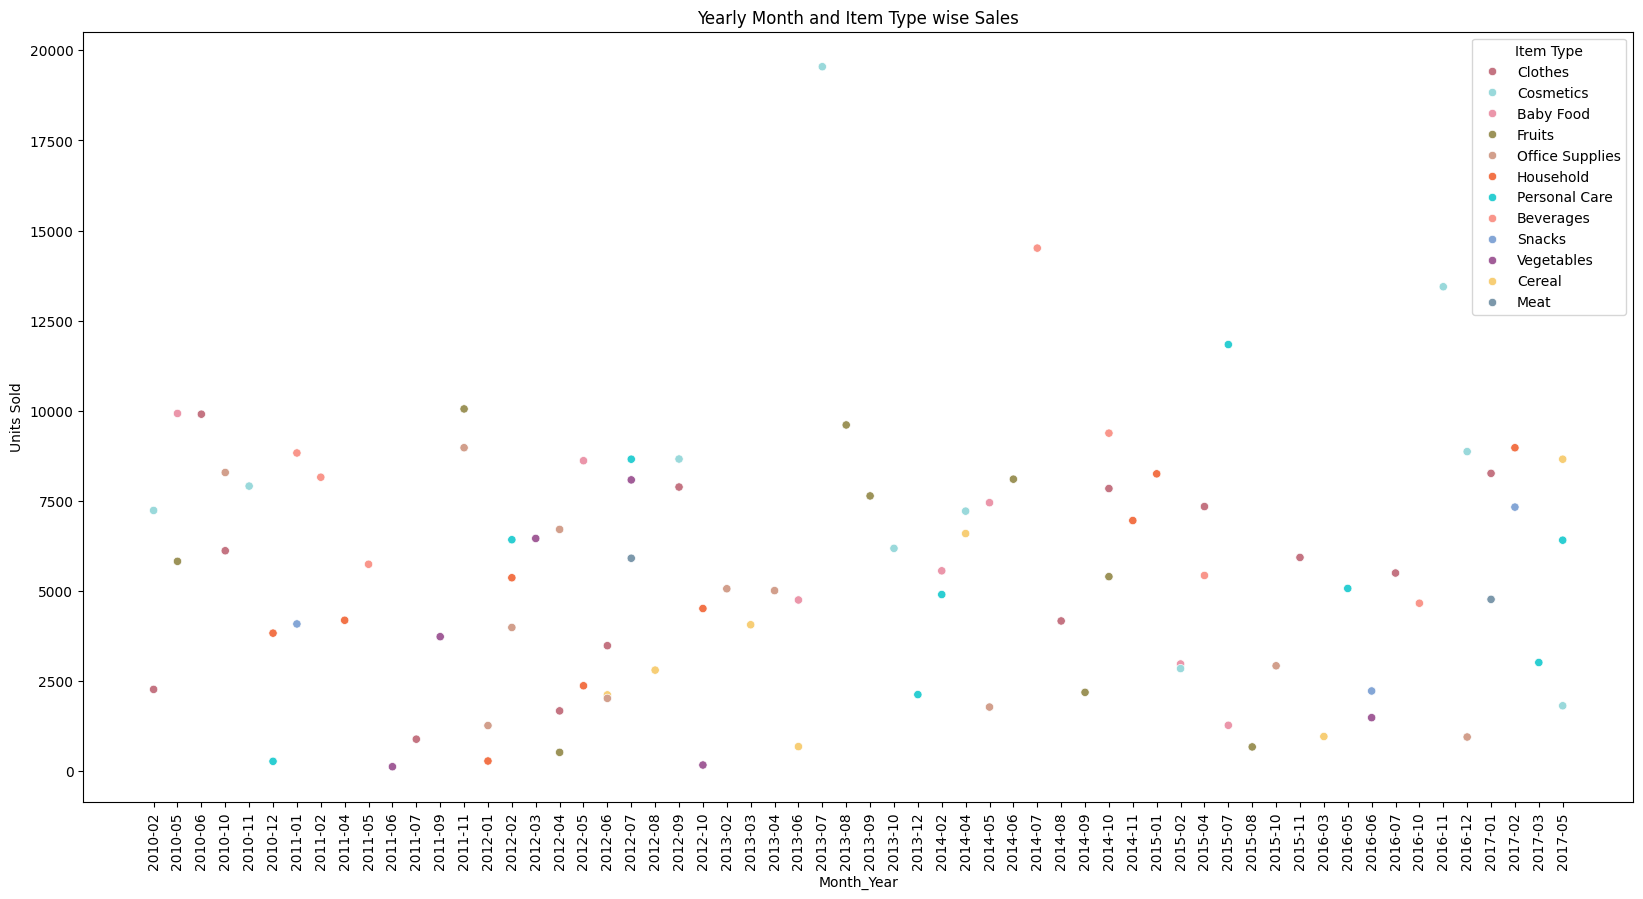

In [90]:
yearly_month_sales = amazon_data.groupby(['Month_Year','Item Type']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(20,10))
sns.scatterplot(x='Month_Year',y='Units Sold',data=yearly_month_sales,palette=base_colors,hue='Item Type')
plt.xticks(rotation='vertical')
plt.title('Yearly Month and Item Type wise Sales')
plt.show()

`Overall Trends`
- `Sales Distribution:` Sales are distributed across various item types with periodic peaks and troughs.
- `High Sales:` Some item types show higher sales at specific points, indicating periodic high demand.<br>

`Monthly Breakdown by Item Type`
- `Clothes`
  - Moderate sales with occasional peaks throughout the timeline.
  - Noticeable peaks around mid-2010, early 2012, and late 2015.
- `Cosmetics`
  - Moderate sales with periodic peaks.
  - High sales in mid-2010, early 2013, and mid-2015.
- `Baby Food`
  - Generally low to moderate sales.
  - Peaks in mid-2012 and late 2014.
- `Fruits`
  - Moderate sales with several peaks.
  - High sales in mid-2011, mid-2013, and mid-2015.
- `Office Supplies`
  - Low to moderate sales.
  - Peaks around mid-2010 and late 2011.
- `Household`
  - Moderate sales with occasional peaks.
  - High sales in mid-2010, early 2013, and mid-2016.
- `Personal Care`
  - Moderate sales with several high points.
  - High sales in mid-2010, early 2013, and early 2016.
- `Beverages`
  - Low to moderate sales.
  - Noticeable peaks around mid-2010, mid-2013, and mid-2015.
- `Snacks`
  - Moderate sales with periodic high points.
  - High sales around mid-2010, early 2014, and mid-2016.
- `Vegetables`
  - Low to moderate sales.
  - Peaks in mid-2010, late 2012, and mid-2016.
- `Cereal`
  - Moderate sales with periodic peaks.
  - High sales around mid-2010 and early 2016.
- `Meat`
  - Low to moderate sales.
  - Peaks around mid-2010, early 2014, and mid-2016.<br>

`Notable Peaks and Lows`
- `High Sales Periods:` Mid-2010 shows high sales across multiple item types. Other high sales periods include early 2013 and mid-2016.
- `Low Sales Periods:` Some item types exhibit low sales in early 2011 and mid-2015.<br>

The scatter plot indicates variability in sales performance across different item types and time periods. Certain item types such as cosmetics, fruits, and personal care consistently show moderate to high sales with periodic peaks. The chart highlights the diverse market conditions and sales performances, suggesting that demand for different items fluctuates over time.

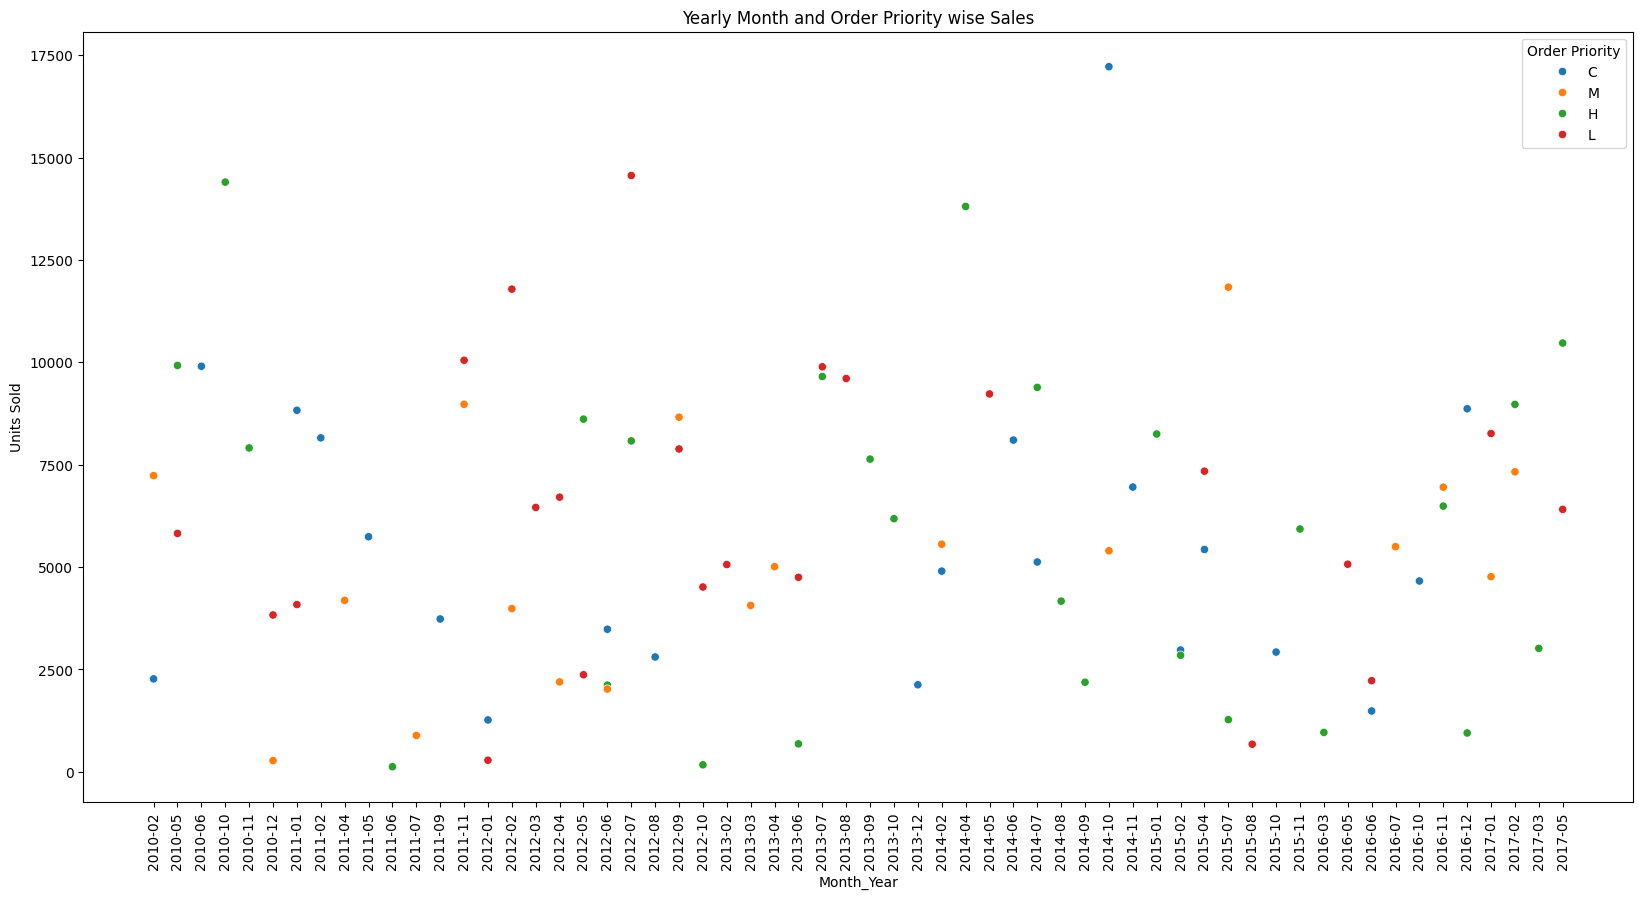

In [91]:
yearly_month_sales = amazon_data.groupby(['Month_Year','Order Priority']).sum(numeric_only=True)['Units Sold'].reset_index()
plt.figure(figsize=(20,10))
sns.scatterplot(x='Month_Year',y='Units Sold',data=yearly_month_sales,hue='Order Priority')
plt.xticks(rotation='vertical')
plt.title('Yearly Month and Order Priority wise Sales')
plt.show()

`Overall Trends`
- `Sales Distribution:`
  - Sales are distributed across various item types with periodic peaks and troughs.
- `High Sales:`
  - Some item types show higher sales at specific points, indicating periodic high demand.<br>

`Monthly Breakdown by Item Type`
- `Clothes:`
  - Moderate sales with occasional peaks throughout the timeline.
  - Noticeable peaks around mid-2010, early 2012, and late 2015.
- `Cosmetics:`
  - Moderate sales with periodic peaks.
  - High sales in mid-2010, early 2013, and mid-2015.
- `Baby Food:`
  - Generally low to moderate sales.
  - Peaks in mid-2012 and late 2014.
- `Fruits:`
  - Moderate sales with several peaks.
  - High sales in mid-2011, mid-2013, and mid-2015.
- `Office Supplies:`
  - Low to moderate sales.
  - Peaks around mid-2010 and late 2011.
- `Household:`
  - Moderate sales with occasional peaks.
  - High sales in mid-2010, early 2013, and mid-2016.
- `Personal Care:`
  - Moderate sales with several high points.
  - High sales in mid-2010, early 2013, and early 2016.
- `Beverages:`
  - Low to moderate sales.
  - Noticeable peaks around mid-2010, mid-2013, and mid-2015.
- `Snacks:`
  - Moderate sales with periodic high points.
  - High sales around mid-2010, early 2014, and mid-2016.
- `Vegetables:`
  - Low to moderate sales.
  - Peaks in mid-2010, late 2012, and mid-2016.
- `Cereal:`
  - Moderate sales with periodic peaks.
  - High sales around mid-2010 and early 2016.
- `Meat:`
  - Low to moderate sales.
  - Peaks around mid-2010, early 2014, and mid-2016.<br>

`Notable Peaks and Lows`
- `High Sales Periods:`
  - Mid-2010 shows high sales across multiple item types.
  - Other high sales periods include early 2013 and mid-2016.<br>

- `Low Sales Periods:`
  - Some item types exhibit low sales in early 2011 and mid-2015.<br>

The scatter plot indicates variability in sales performance across different item types and time periods. Certain item types such as cosmetics, fruits, and personal care consistently show moderate to high sales with periodic peaks. The chart highlights the diverse market conditions and sales performances, suggesting that demand for different items fluctuates over time.